<a href="https://colab.research.google.com/github/Debsadetsky/exercicio1-cursogit/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
pip install optbinning pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 43.3 MB/s eta 0:00:00
   ━━━━━

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from optbinning import BinningProcess, ContinuousOptimalBinning
from optbinning.scorecard import Scorecard


(CVXPY) Jan 27 12:24:43 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 27 12:24:43 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [48]:
# Lendo todas as abas do arquivo da comextat
df = pd.read_csv('/content/drive/MyDrive/TCC/base_analitica_final_v1.csv', sep = ';')
df.head()

,Data,NCM,Pais,USD (FOB),Ton_importado,Cotacao_USD,RegiÃ£o,TPD,TPA,Valor Vendido (R$),Qtd Vendida (u),KG Vendidos,Ton_Vendido
0,2023-01-01,70132800,ALEMANHA,"65,334.00",6.30,5.2,EUROPA,14838.05,5415888.25,5361981.12,305488.62,63307.99,63.31
1,2023-01-01,70132800,CHINA,"260,620.00",242.26,5.2,ASIA,36558.00,13343670.00,5361981.12,305488.62,63307.99,63.31
2,2023-01-01,70132800,EGITO,"108,707.00",127.25,5.2,AFRICA,3547.00,1294655.00,5361981.12,305488.62,63307.99,63.31
3,2023-01-01,70132800,ESPANHA,"5,119.00",0.66,5.2,EUROPA,7852.00,2865980.00,5361981.12,305488.62,63307.99,63.31
4,2023-01-01,70132800,PORTUGAL,469,0.16,5.2,EUROPA,4853.00,1771345.00,5361981.12,305488.62,63307.99,63.31


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                1396 non-null   object 
 1   NCM                 1396 non-null   int64  
 2   Pais                1396 non-null   object 
 3   USD (FOB)           1396 non-null   object 
 4   Ton_importado       1396 non-null   float64
 5   Cotacao_USD         1396 non-null   float64
 6   RegiÃ£o             1396 non-null   object 
 7   TPD                 1396 non-null   float64
 8   TPA                 1396 non-null   float64
 9   Valor Vendido (R$)  1396 non-null   float64
 10  Qtd Vendida (u)     1396 non-null   float64
 11  KG Vendidos         1396 non-null   float64
 12  Ton_Vendido         1396 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 141.9+ KB


In [59]:
df = df.rename(columns={'RegiÃ£o': 'Regiao'})

In [51]:
df.describe()

,NCM,Ton_importado,Cotacao_USD,TPD,TPA,Valor Vendido (R$),Qtd Vendida (u),KG Vendidos,Ton_Vendido
count,1.396000e+03,1396.000000,1396.000000,1396.000000,1.396000e+03,1.396000e+03,1.396000e+03,1396.000000,1396.000000
mean,7.013386e+07,166.202335,5.119685,9428.591655,3.441436e+06,9.868410e+06,6.463390e+05,208960.806347,208.960638
std,8.467079e+02,593.811895,0.251194,10753.579578,3.925057e+06,5.390404e+06,3.373857e+05,156242.060036,156.242320
min,7.013280e+07,0.000000,4.800000,4.000000,1.460000e+03,2.067722e+06,8.281759e+04,17177.440000,17.180000
25%,7.013280e+07,0.447500,4.910000,1934.000000,7.059100e+05,6.101167e+06,3.477433e+05,76939.740000,76.940000
50%,7.013370e+07,8.485000,5.020000,4853.000000,1.771345e+06,8.302618e+06,7.298028e+05,168248.510000,168.250000
75%,7.013490e+07,46.530000,5.210000,13387.000000,4.886255e+06,1.325874e+07,8.626742e+05,338085.380000,338.090000
max,7.013490e+07,6287.290000,5.620000,38298.000000,1.397877e+07,3.398509e+07,1.696010e+06,837977.710000,837.980000


<ipython-input-53-5ff8890d67b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ordenado, x='Pais', y='Ton_importado', palette='viridis')


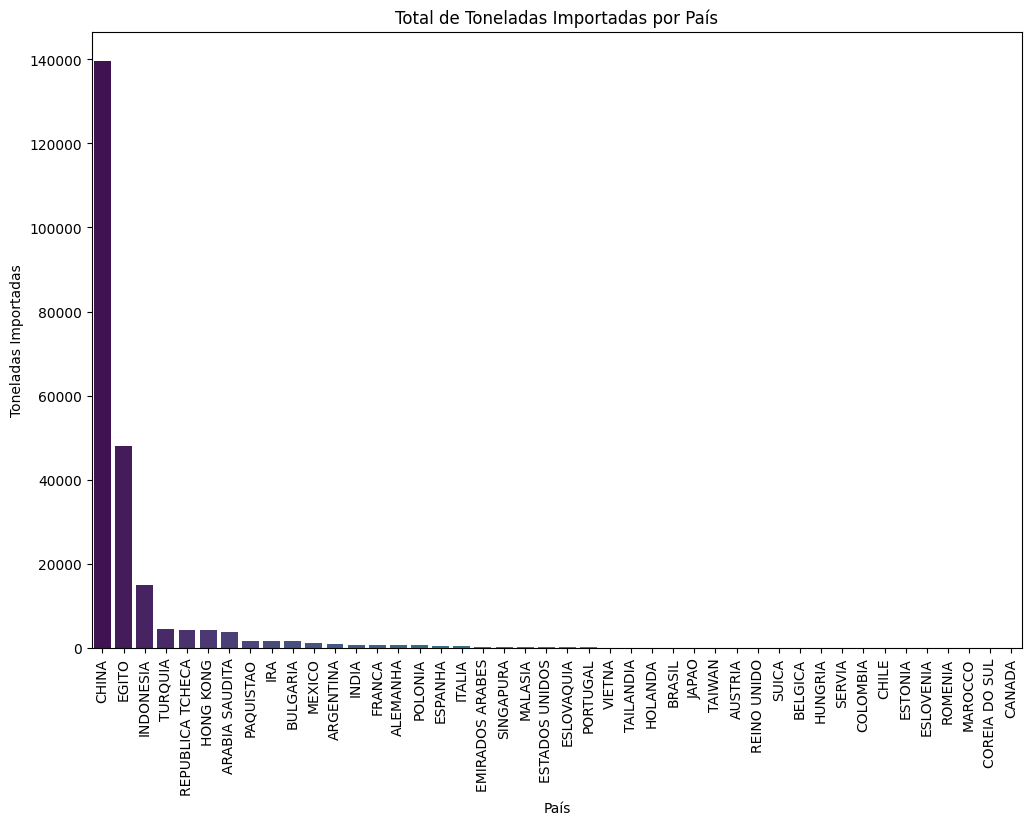

In [53]:
# Análise de importação por País
pais_importacao = df.groupby('Pais')['Ton_importado'].sum().reset_index()

# Ordenar os países pelo total de toneladas importadas
ordenado = pais_importacao.sort_values(by='Ton_importado', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(data=ordenado, x='Pais', y='Ton_importado', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total de Toneladas Importadas por País')
plt.xlabel('País')
plt.ylabel('Toneladas Importadas')
plt.show()

Alta Dependência da China: A China apresenta um volume significativamente maior de importações em comparação com outros países. Isso indica uma possível dependência comercial desse país.

Outros países como: Egito, Indonésia,Turquia e República Tcheca também apresentam volumes significativos, mas bem abaixo da China.

Diversificação: Muitos países têm participação quase insignificante, o que sugere que a origem das importações está concentrada em poucos países.

In [54]:
df[df['Pais'] == 'CHINA'].describe()

,NCM,Ton_importado,Cotacao_USD,TPD,TPA,Valor Vendido (R$),Qtd Vendida (u),KG Vendidos,Ton_Vendido
count,6.600000e+01,66.000000,66.000000,66.000000,6.600000e+01,6.600000e+01,6.600000e+01,66.000000,66.000000
mean,7.013380e+07,2113.769697,5.121818,37675.727273,1.375164e+07,9.645639e+06,6.251115e+05,200766.854848,200.766667
std,8.668244e+02,1539.885890,0.249904,578.323294,2.110880e+05,5.340250e+06,3.382553e+05,155652.358312,155.652491
min,7.013280e+07,236.420000,4.800000,36558.000000,1.334367e+07,2.067722e+06,8.281759e+04,17177.440000,17.180000
25%,7.013280e+07,1011.635000,4.910000,37108.000000,1.354442e+07,5.970493e+06,3.262053e+05,72045.232500,72.042500
50%,7.013370e+07,1754.535000,5.040000,37908.000000,1.383642e+07,8.223312e+06,6.855281e+05,165106.180000,165.105000
75%,7.013490e+07,2426.080000,5.210000,38028.000000,1.388022e+07,1.294828e+07,8.441879e+05,333714.657500,333.710000
max,7.013490e+07,6287.290000,5.620000,38298.000000,1.397877e+07,3.398509e+07,1.696010e+06,837977.710000,837.980000


In [55]:
# Converter a coluna 'Data' para o formato datetime
df['Data'] = pd.to_datetime(df['Data'])

df['Trimestre'] = df['Data'].dt.to_period('Q')  # Período trimestral

# Agregar por trimestre e país
dados_sazonais = df.groupby(['Trimestre', 'Pais'])['Ton_importado'].sum().reset_index()

# Filtro para os países mais relevantes (exemplo: China, Indonésia, etc.)
paises_relevantes = ['CHINA', 'EGITO', 'INDONESIA']
dados_filtrados = dados_sazonais[dados_sazonais['Pais'].isin(paises_relevantes)]
dados_filtrados

,Trimestre,Pais,Ton_importado
8,2023Q1,CHINA,5633.29
9,2023Q1,EGITO,4398.17
19,2023Q1,INDONESIA,595.89
38,2023Q2,CHINA,9018.64
39,2023Q2,EGITO,3214.85
50,2023Q2,INDONESIA,1820.70
74,2023Q3,CHINA,16197.47
76,2023Q3,EGITO,4090.50
86,2023Q3,INDONESIA,3259.47
110,2023Q4,CHINA,20046.96


<ipython-input-56-0b12ad54322a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['Trimestre'] = dados_filtrados['Trimestre'].astype(str)


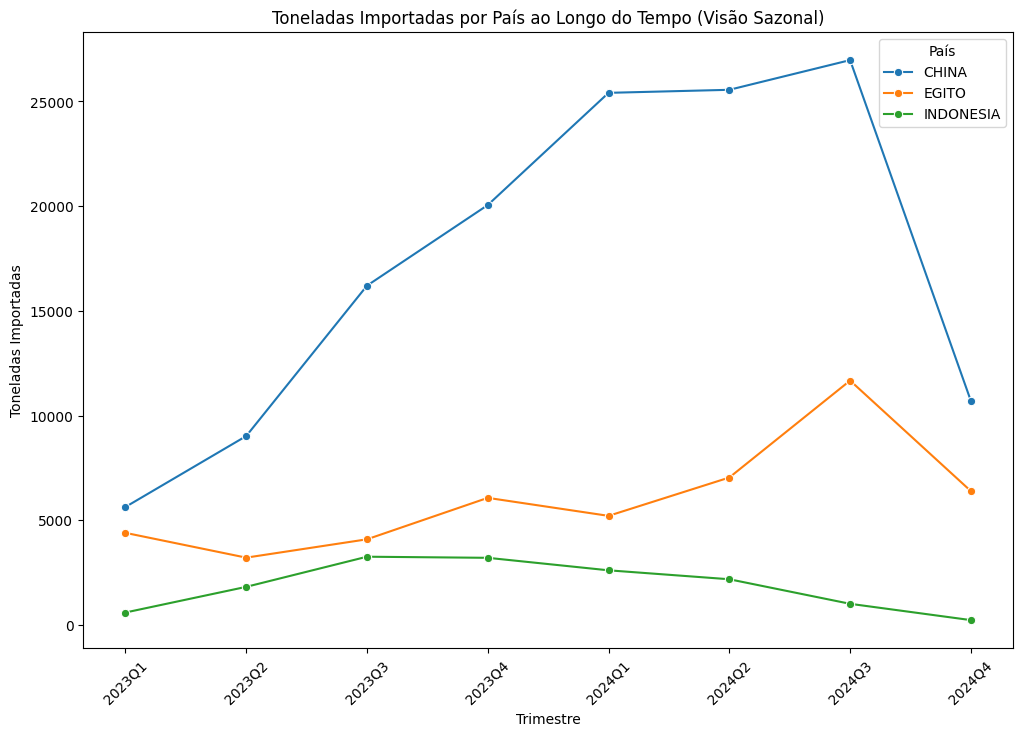

In [56]:
dados_filtrados['Trimestre'] = dados_filtrados['Trimestre'].astype(str)

# Plotar a visão sazonal
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=dados_filtrados,
    x='Trimestre',
    y='Ton_importado',
    hue='Pais',
    marker='o'
)
plt.title('Toneladas Importadas por País ao Longo do Tempo (Visão Sazonal)')
plt.xlabel('Trimestre')
plt.ylabel('Toneladas Importadas')
plt.legend(title='País')
plt.xticks(rotation=45)
plt.show()

Análise Geral

China (Linha Azul):

Padrão de Crescimento: A China apresenta um crescimento significativo nas importações desde 2023Q1, atingindo um pico em 2024Q3.

Queda Brusca no 2024Q4: A queda em 2024Q4 é notável, mas pode ser explicada pela ausência de dados completos (só considerando outubro). Apesar disso, o volume de um único mês (outubro) já é comparável ao total de 2023Q1, o que indica que o trimestre pode superar os valores de 2024Q3 se os meses seguintes forem consistentes.
Dependência Elevada: A China domina as importações, contribuindo com volumes muito maiores em comparação aos outros países.


Egito (Linha Laranja):

Estabilidade e Picos: O Egito apresentou relativa estabilidade durante 2023, mas houve um aumento notável em 2024Q2 e 2024Q3.
Contribuição Moderada: Embora o Egito seja um fornecedor relevante, ele contribui com volumes bem menores em relação à China.


Indonésia (Linha Verde):

Padrão de Declínio: A Indonésia mostrou um leve crescimento em 2023Q3, seguido por um declínio constante até 2024Q3.
Contribuição Pequena: A Indonésia tem o menor volume entre os três países analisados, com uma participação marginal nas importações.


O Egito e a Indonésia mostram ciclos mais suaves e estáveis em comparação com a China, possivelmente devido a uma capacidade produtiva menor ou menor competitividade no mercado.
2024Q4


As importações da China dominam o mercado. Isso sugere uma forte dependência desse país, o que pode ser um risco em casos de flutuações econômicas, políticas ou logísticas envolvendo a China.

In [57]:
df.columns

Index(['Data', 'NCM', 'Pais', 'USD (FOB) ', 'Ton_importado', 'Cotacao_USD',
       'RegiÃ£o', 'TPD', 'TPA', 'Valor Vendido (R$)', 'Qtd Vendida (u)',
       'KG Vendidos', 'Ton_Vendido', 'Trimestre'],
      dtype='object')

In [62]:
df = df[['Data', 'NCM', 'Pais', 'USD (FOB) ', 'Ton_importado', 'Cotacao_USD',
       'Regiao', 'TPD', 'TPA', 'Valor Vendido (R$)', 'Qtd Vendida (u)',
       'KG Vendidos', 'Ton_Vendido']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                1396 non-null   datetime64[ns]
 1   NCM                 1396 non-null   int64         
 2   Pais                1396 non-null   object        
 3   USD (FOB)           1396 non-null   object        
 4   Ton_importado       1396 non-null   float64       
 5   Cotacao_USD         1396 non-null   float64       
 6   Regiao              1396 non-null   object        
 7   TPD                 1396 non-null   float64       
 8   TPA                 1396 non-null   float64       
 9   Valor Vendido (R$)  1396 non-null   float64       
 10  Qtd Vendida (u)     1396 non-null   float64       
 11  KG Vendidos         1396 non-null   float64       
 12  Ton_Vendido         1396 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), obje

Criamos um book de vendas, ou seja, construimos variaveis relacionadas as informacoes de venda que temos ('Valor Vendido (R$)', 'Qtd Vendida (u)',, 'Ton_Vendido').

Isso é necessário, pois essas variáveis são informações do futuro. Ou seja, se quisermos prever as Toneladas de Vidro importadas da China para o NCM X em fev/24, por exemplo, não podemos pegar as vendas de fev/24, pois estariamos utilizando dados do futuro (impossivel).

Devido a isso, criamos variaveis a partir de informacoes do passado, como:

* Valor Vendido nos últimos X meses
* Quantidade Vendida nos últimos X meses
* KG Vendidos nos últimos X meses
* Toneladas Vendidas nos últimos X meses
* Média do Valor por Quantidade Vendida nos últimos X meses
* Média do Valor por Tonelada Vendida nos últimos X meses
* Média de KG Vendido por Quantidade Vendida nos últimos X meses

Obs: Vamos Considerar que temos as informações estimadas previamente da cotação do dólar, capacidades produtivas por País e quais países que vamos fazer as importações.

In [91]:
df.columns

Index(['Data', 'NCM', 'Pais', 'USD (FOB) ', 'Ton_importado', 'Cotacao_USD',
       'Regiao', 'TPD', 'TPA', 'Valor Vendido (R$)', 'Qtd Vendida (u)',
       'KG Vendidos', 'Ton_Vendido'],
      dtype='object')

In [134]:
var_vendas = df[['Data', 'NCM', 'Valor Vendido (R$)', 'Qtd Vendida (u)', 'Ton_Vendido']].drop_duplicates()
var_vendas.reset_index(drop=True, inplace=True)

var_vendas

,Data,NCM,Valor Vendido (R$),Qtd Vendida (u),Ton_Vendido
0,2023-01-01,70132800,5361981.12,305488.62,63.31
1,2023-01-01,70133700,9349164.52,880704.53,175.56
2,2023-01-01,70134900,14206163.37,747026.55,425.38
3,2023-02-01,70132800,4565093.53,258893.46,53.66
4,2023-02-01,70133700,7836121.44,724517.13,144.43
...,...,...,...,...,...
61,2024-09-01,70133700,5536555.60,431021.18,85.92
62,2024-09-01,70134900,7716888.61,361784.12,202.93
63,2024-10-01,70132800,2067722.31,82817.59,17.18
64,2024-10-01,70133700,4813355.91,397225.37,79.18


In [137]:
# Converter a coluna 'Data' para o tipo datetime, se ainda não estiver
var_vendas['Data'] = pd.to_datetime(var_vendas['Data'])

# Função para calcular as métricas
def calculate_sales_metrics_for_date(df, col, current_date, months):
    cutoff_date = current_date - pd.DateOffset(months=months)
    recent_sales = df[(df['Data'] < current_date) & (df['Data'] >= cutoff_date)]

    total_sales = recent_sales[col].sum()
    if months > 1:
        min_sales = recent_sales[col].min()
        max_sales = recent_sales[col].max()
        avg_sales = round(recent_sales[col].mean(),2)
    else:
        min_sales = max_sales = avg_sales = None  # Não calcular para 1 mês

    return total_sales, min_sales, max_sales, avg_sales

In [165]:
# Função para calcular a média das razões
def calculate_ratio_metrics_for_date(df, current_date, months):
    cutoff_date = current_date - pd.DateOffset(months=months)
    recent_sales = df[(df['Data'] < current_date) & (df['Data'] >= cutoff_date)].copy()
    # Calcular as razões
    recent_sales['Valor_por_Qtd'] = round(recent_sales['Valor Vendido (R$)'] / recent_sales['Qtd Vendida (u)'],2)
    recent_sales['Valor_por_Ton'] = round(recent_sales['Valor Vendido (R$)'] / recent_sales['Ton_Vendido'],2)
    recent_sales['Kg_por_Qtd'] = round(recent_sales['Ton_Vendido']*1000 / recent_sales['Qtd Vendida (u)'],2)
    #print(current_date, months, ':\n', recent_sales['Qtd Vendida (u)'])

    # Calcular as médias das razões, ignorando NaN
    avg_valor_por_qtd = round(recent_sales['Valor_por_Qtd'].mean(),2)
    avg_valor_por_ton = round(recent_sales['Valor_por_Ton'].mean(),2)
    avg_kg_por_qtd = round(recent_sales['Kg_por_Qtd'].mean(),2)
    #print('\n',recent_sales['Ton_Vendido'],'\n', recent_sales['Qtd Vendida (u)'],'\n', avg_ton_por_qtd)

    return avg_valor_por_qtd, avg_valor_por_ton, avg_kg_por_qtd

In [168]:
# Colunas de interesse
columns_of_interest = ['Valor Vendido (R$)', 'Qtd Vendida (u)', 'Ton_Vendido']

# Aplicar a função para cada data e NCM
results = []
for ncm, group in var_vendas.groupby('NCM'):
    for index, row in group.iterrows():
        date = row['Data']
        result_entry = {'Data': date, 'NCM': ncm}

        for col in columns_of_interest:
            metrics_6_months = calculate_sales_metrics_for_date(group, col, date, 6)
            metrics_3_months = calculate_sales_metrics_for_date(group, col, date, 3)
            metrics_1_month = calculate_sales_metrics_for_date(group, col, date, 1)

            # Adicionando métricas ao dicionário de resultados
            result_entry.update({
                f'Total_6_Meses_{col}': metrics_6_months[0],
                f'Min_6_Meses_{col}': metrics_6_months[1],
                f'Max_6_Meses_{col}': metrics_6_months[2],
                f'Media_6_Meses_{col}': metrics_6_months[3],
                f'Total_3_Meses_{col}': metrics_3_months[0],
                f'Min_3_Meses_{col}': metrics_3_months[1],
                f'Max_3_Meses_{col}': metrics_3_months[2],
                f'Media_3_Meses_{col}': metrics_3_months[3],
                f'Total_1_Mes_{col}': metrics_1_month[0],
            })

                    # Calcular médias das razões para os períodos especificados
        valor_por_qtd_1_mes, valor_por_ton_1_mes, kg_por_qtd_1_mes = calculate_ratio_metrics_for_date(group, date, 1)
        valor_por_qtd_3_meses, valor_por_ton_3_meses, kg_por_qtd_3_meses = calculate_ratio_metrics_for_date(group, date, 3)
        valor_por_qtd_6_meses, valor_por_ton_6_meses, kg_por_qtd_6_meses = calculate_ratio_metrics_for_date(group, date, 6)

        result_entry.update({
            'Valor_por_Qtd_Vendida_ultimo_1_mes': valor_por_qtd_1_mes,
            'Valor_por_Qtd_Vendida_ultimo_3_meses': valor_por_qtd_3_meses,
            'Valor_por_Qtd_Vendida_ultimo_6_meses': valor_por_qtd_6_meses,
            'Valor_por_Ton_Vendida_ultimo_1_mes': valor_por_ton_1_mes,
            'Valor_por_Ton_Vendida_ultimo_3_meses': valor_por_ton_3_meses,
            'Valor_por_Ton_Vendida_ultimo_6_meses': valor_por_ton_6_meses,
            'Kg_por_Qtd_Vendida_ultimo_1_mes': kg_por_qtd_1_mes,
            'Kg_por_Qtd_Vendida_ultimo_3_meses': kg_por_qtd_3_meses,
            'Kg_por_Qtd_Vendida_ultimo_6_meses': kg_por_qtd_6_meses,
        })

        results.append(result_entry)

# Criar um novo DataFrame com os resultados
book_vendas = pd.DataFrame(results)

# Exibir os resultados
book_vendas

,Data,NCM,Total_6_Meses_Valor Vendido (R$),Min_6_Meses_Valor Vendido (R$),Max_6_Meses_Valor Vendido (R$),Media_6_Meses_Valor Vendido (R$),Total_3_Meses_Valor Vendido (R$),Min_3_Meses_Valor Vendido (R$),Max_3_Meses_Valor Vendido (R$),Media_3_Meses_Valor Vendido (R$),...,Total_1_Mes_Ton_Vendido,Valor_por_Qtd_Vendida_ultimo_1_mes,Valor_por_Qtd_Vendida_ultimo_3_meses,Valor_por_Qtd_Vendida_ultimo_6_meses,Valor_por_Ton_Vendida_ultimo_1_mes,Valor_por_Ton_Vendida_ultimo_3_meses,Valor_por_Ton_Vendida_ultimo_6_meses,Kg_por_Qtd_Vendida_ultimo_1_mes,Kg_por_Qtd_Vendida_ultimo_3_meses,Kg_por_Qtd_Vendida_ultimo_6_meses
0,2023-01-01,70132800,0.000000e+00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-01,70132800,5.361981e+06,5361981.12,5361981.12,5361981.12,5361981.12,5361981.12,5361981.12,5361981.12,...,63.31,17.55,17.55,17.55,84694.06,84694.06,84694.06,0.21,0.21,0.21
2,2023-03-01,70132800,9.927075e+06,4565093.53,5361981.12,4963537.32,9927074.65,4565093.53,5361981.12,4963537.32,...,53.66,17.63,17.59,17.59,85074.42,84884.24,84884.24,0.21,0.21,0.21
3,2023-04-01,70132800,1.558938e+07,4565093.53,5662303.12,5196459.26,15589377.77,4565093.53,5662303.12,5196459.26,...,62.46,18.79,17.99,17.99,90654.87,86807.78,86807.78,0.21,0.21,0.21
4,2023-05-01,70132800,2.089135e+07,4565093.53,5662303.12,5222838.65,15529373.48,4565093.53,5662303.12,5176457.83,...,57.76,19.01,18.48,18.24,91793.23,89174.17,88054.14,0.21,0.21,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-06-01,70134900,1.069385e+08,12522294.41,33985086.18,17823088.55,45537638.99,12522294.41,17028568.62,15179213.00,...,454.77,19.64,18.81,19.19,37444.35,37161.43,37593.79,0.52,0.50,0.51
62,2024-07-01,70134900,9.009053e+07,12522294.41,17137089.13,15015089.04,46687952.16,12522294.41,17137089.13,15562650.72,...,462.97,18.62,18.90,18.48,37015.55,37237.70,37003.73,0.50,0.50,0.50
63,2024-08-01,70134900,8.208136e+07,6147889.05,17137089.13,13680226.89,40313546.80,6147889.05,17137089.13,13437848.93,...,152.44,23.26,20.51,19.27,40329.89,38263.26,37397.74,0.58,0.53,0.51
64,2024-09-01,70134900,7.539110e+07,6147889.05,17137089.13,12565183.14,29853459.84,6147889.05,17137089.13,9951153.28,...,168.25,22.70,21.53,20.17,39040.01,38795.15,37978.29,0.58,0.55,0.53


Transformando as variáveis categóricas em numéricas.

De todas as variáveis que temos, 3 são categóricas:
NCM, Pais e Regiao. Para conseguimos utiliza-las nos modelos de predição, precisamos transformá-las em variáveis númericas.

Queremos entender como diferentes categorias de tipo de produto (NCM), país de origem da importação, e região, afetam a quantidade importada em toneladas. Para isso, utilizamos uma técnica chamada Weight of Evidence (WOE).

O Weight of Evidence é uma forma de transformar informações categóricas (como países ou tipos de produto) em números. No entando são números que trazem a informação da importância de cada categoria na previsão de toneladas importadas.


Inicialmente, selecionamos as colunas categóricas mencionadas acima (NCM, Pais e Regiao) e a nossa variável alvo (Ton_importado). Queremos ver como cada categoria de cada uma das variáveis influenciam nas Tonelas importadas.

Para cada categoria (como um país específico ou um tipo de produto), calculamos um número chamado WOE. Esse número nos diz o quão forte essa categoria está associada a um alto ou baixo nível de importação.

Os resultados nos mostram quais categorias têm maior impacto na quantidade importada. Por exemplo, se um país tem um WOE alto, isso pode significar que ele está fortemente associado a importações maiores.

WOE: Um número que representa a força e direção da associação entre a categoria e o alvo (quantidade importada).
IV (Information Value): Um resumo de quanto valor de informação essa variável categórica está adicionando ao modelo. Valores mais altos indicam que a variável é mais importante.

In [172]:
df.columns

Index(['Data', 'NCM', 'Pais', 'USD (FOB) ', 'Ton_importado', 'Cotacao_USD',
       'Regiao', 'TPD', 'TPA', 'Valor Vendido (R$)', 'Qtd Vendida (u)',
       'KG Vendidos', 'Ton_Vendido'],
      dtype='object')

In [184]:
# Variáveis categóricas
variaveis_categoricas = ['Pais', 'Regiao']

# Definir a variável target contínua
target = df['Ton_importado']  # Substitua pelo nome da sua variável target

# Loop pelas variáveis categóricas para calcular WoE
woe_dict = {}

# Novo DataFrame para armazenar as variáveis com WoE
df_woe = df[['Data', 'NCM', 'Pais', 'USD (FOB) ', 'Ton_importado',
       'Regiao', 'TPD']].copy()

for var in variaveis_categoricas:
    print(f"Processando variável: {var}")

    # Criar o modelo de binning
    optb = ContinuousOptimalBinning(name=var, dtype="categorical")

    # Ajustar o modelo com a variável categórica e o target contínuo
    optb.fit(df_woe[var], target)
    df_woe[var] = optb.fit_transform(df_woe[var], target, metric = 'bins')

    # Calcular os binning table e WoE
    binning_table = optb.binning_table.build()
    woe_dict[var] = binning_table  # Salva o binning table para análise posterior


Processando variável: Pais
Processando variável: Regiao


In [185]:
woe_dict['Pais']

,Bin,Count,Count (%),Sum,Std,Mean,Min,Max,Zeros count,WoE,IV
0,"[CANADA, COREIA DO SUL, MAROCCO, ESLOVENIA, SE...",108,0.077364,15.23,0.238269,0.141019,0.00,1.42,18,-166.061317,12.847151
1,"[JAPAO, TAIWAN, BRASIL, HOLANDA]",97,0.069484,100.02,4.387148,1.031134,0.00,30.26,14,-165.171201,11.476796
2,"[ESLOVAQUIA, PORTUGAL, TAILANDIA, ESTADOS UNIDOS]",183,0.131089,523.18,6.539575,2.858907,0.00,47.11,15,-163.343428,21.412498
3,"[ITALIA, VIETNA]",75,0.053725,607.93,7.835023,8.105733,0.03,46.08,0,-158.096602,8.493729
4,"[EMIRADOS ARABES, ALEMANHA]",90,0.064470,950.73,11.647279,10.563667,0.01,46.05,0,-155.638669,10.034012
5,"[ESPANHA, FRANCA, POLONIA]",151,0.108166,1996.13,18.340678,13.219404,0.00,105.97,2,-152.982931,16.547581
6,"[INDIA, BULGARIA, ARGENTINA]",133,0.095272,3384.49,29.401702,25.447293,0.00,135.36,4,-140.755042,13.410043
7,"[PAQUISTAO, IRA, MEXICO, MALASIA]",135,0.096705,4849.32,38.655536,35.920889,0.07,200.86,0,-130.281446,12.598850
8,"[SINGAPURA, HONG KONG, REPUBLICA TCHECA, TURQUIA]",198,0.141834,13315.28,89.632132,67.248889,0.01,822.78,0,-98.953446,14.034944
9,"[ARABIA SAUDITA, INDONESIA]",95,0.068052,18685.06,280.826145,196.684842,0.20,1172.02,0,30.482507,2.074383


In [186]:
woe_dict['Regiao']

,Bin,Count,Count (%),Sum,Std,Mean,Min,Max,Zeros count,WoE,IV
0,"[EUROPA, AMERICA DO SUL]",711,0.509312,10478.23,35.753153,14.737314,0.0,363.86,28,-151.465022,77.143002
1,[AMERICA DO NORTE],77,0.055158,1464.97,31.648059,19.025584,0.0,200.86,13,-147.176751,8.117915
2,"[ASIA, AFRICA]",608,0.435530,220075.26,859.953836,361.965888,0.0,6287.29,12,195.763553,85.260917
3,Special,0,0.000000,0.00,NaN,0.000000,NaN,NaN,0,-166.202335,0.000000
4,Missing,0,0.000000,0.00,NaN,0.000000,NaN,NaN,0,-166.202335,0.000000
Totals,,1396,1.000000,232018.46,,166.202335,0.0,6287.29,53,826.809996,170.521834


In [228]:
df_woe['USD (FOB) '] = df_woe['USD (FOB) '].str.replace(',', '').astype(float)
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           1396 non-null   datetime64[ns]
 1   NCM            1396 non-null   int64         
 2   Pais           1396 non-null   object        
 3   USD (FOB)      1396 non-null   float64       
 4   Ton_importado  1396 non-null   float64       
 5   Regiao         1396 non-null   object        
 6   TPD            1396 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 76.5+ KB


In [229]:
# Agrupar por 'Data', 'NCM', 'Pais' e 'Regiao', somar as demais colunas
df_woe_grouped = (
    df_woe.groupby(["Data", "NCM", "Pais", "Regiao"], as_index=False)
    .sum(numeric_only=True)  # Somente colunas numéricas
)

df_woe_grouped

,Data,NCM,Pais,Regiao,USD (FOB),Ton_importado,TPD
0,2023-01-01,70132800,['ARABIA SAUDITA' 'INDONESIA'],['ASIA' 'AFRICA'],94928.0,84.90,1860.00
1,2023-01-01,70132800,['CANADA' 'COREIA DO SUL' 'MAROCCO' 'ESLOVENIA...,['EUROPA' 'AMERICA DO SUL'],317.0,0.00,70.00
2,2023-01-01,70132800,['EGITO' 'CHINA'],['ASIA' 'AFRICA'],369327.0,369.51,40105.00
3,2023-01-01,70132800,['EMIRADOS ARABES' 'ALEMANHA'],['EUROPA' 'AMERICA DO SUL'],65334.0,6.30,14838.05
4,2023-01-01,70132800,['ESLOVAQUIA' 'PORTUGAL' 'TAILANDIA' 'ESTADOS ...,['EUROPA' 'AMERICA DO SUL'],83490.0,8.64,5422.00
...,...,...,...,...,...,...,...
945,2024-10-01,70134900,['ITALIA' 'VIETNA'],['EUROPA' 'AMERICA DO SUL'],30346.0,7.14,14357.00
946,2024-10-01,70134900,['JAPAO' 'TAIWAN' 'BRASIL' 'HOLANDA'],['ASIA' 'AFRICA'],1850.0,1.44,5509.00
947,2024-10-01,70134900,['PAQUISTAO' 'IRA' 'MEXICO' 'MALASIA'],['ASIA' 'AFRICA'],60382.0,100.06,5195.00
948,2024-10-01,70134900,['SINGAPURA' 'HONG KONG' 'REPUBLICA TCHECA' 'T...,['ASIA' 'AFRICA'],110998.0,67.09,48360.35


In [230]:
df_woe_grouped['Regiao'] = df_woe_grouped['Regiao'].apply(lambda x: x.replace("['", "").replace("']", "").replace(" '", ", ").replace("'", ""))
df_woe_grouped["Pais"] = df_woe_grouped["Pais"].apply(lambda x: x.replace("['", "").replace("']", "").replace(" '", ", ").replace("'", "").replace("\n", ""))

In [231]:
df_woe_grouped['Regiao'].head().to_list()

['ASIA, AFRICA',
 'EUROPA, AMERICA DO SUL',
 'ASIA, AFRICA',
 'EUROPA, AMERICA DO SUL',
 'EUROPA, AMERICA DO SUL']

In [232]:
df_woe_grouped["Pais"].head().to_list()

['ARABIA SAUDITA, INDONESIA',
 'CANADA, COREIA DO SUL, MAROCCO, ESLOVENIA, SERVIA, ROMENIA, HUNGRIA, ESTONIA, CHILE, REINO UNIDO, COLOMBIA, BELGICA, AUSTRIA, SUICA',
 'EGITO, CHINA',
 'EMIRADOS ARABES, ALEMANHA',
 'ESLOVAQUIA, PORTUGAL, TAILANDIA, ESTADOS UNIDOS']

Transformando as variáveis Pais e Regiao no valor do Woe associado calculado pelo OptBinning

In [233]:
# Convertendo arrays restantes em strings
bins_regiao = [', '.join(arr) if isinstance(arr, np.ndarray) else arr for arr in woe_dict['Regiao']["Bin"]]
bins_pais = [', '.join(arr) if isinstance(arr, np.ndarray) else arr for arr in woe_dict['Pais']["Bin"]]

# Verificando o resultado
bins_regiao

['EUROPA, AMERICA DO SUL',
 'AMERICA DO NORTE',
 'ASIA, AFRICA',
 'Special',
 'Missing',
 '']

In [234]:
# Criar o dicionário automaticamente a partir da tabela de WoE
woe_regiao_mapping = dict(zip(bins_regiao, woe_dict['Regiao']["WoE"].tolist()))
woe_pais_mapping = dict(zip(bins_pais, woe_dict['Pais']["WoE"].tolist()))

# Adicionar coluna de WoE ao DataFrame original
df_woe_grouped["WoE_Regiao"] = df_woe_grouped["Regiao"].map(woe_regiao_mapping)
df_woe_grouped["WoE_Pais"] = df_woe_grouped["Pais"].map(woe_pais_mapping)

df_woe_grouped

,Data,NCM,Pais,Regiao,USD (FOB),Ton_importado,TPD,WoE_Regiao,WoE_Pais
0,2023-01-01,70132800,"ARABIA SAUDITA, INDONESIA","ASIA, AFRICA",94928.0,84.90,1860.00,195.763553,30.482507
1,2023-01-01,70132800,"CANADA, COREIA DO SUL, MAROCCO, ESLOVENIA, SER...","EUROPA, AMERICA DO SUL",317.0,0.00,70.00,-151.465022,-166.061317
2,2023-01-01,70132800,"EGITO, CHINA","ASIA, AFRICA",369327.0,369.51,40105.00,195.763553,1265.790718
3,2023-01-01,70132800,"EMIRADOS ARABES, ALEMANHA","EUROPA, AMERICA DO SUL",65334.0,6.30,14838.05,-151.465022,-155.638669
4,2023-01-01,70132800,"ESLOVAQUIA, PORTUGAL, TAILANDIA, ESTADOS UNIDOS","EUROPA, AMERICA DO SUL",83490.0,8.64,5422.00,-151.465022,-163.343428
...,...,...,...,...,...,...,...,...,...
945,2024-10-01,70134900,"ITALIA, VIETNA","EUROPA, AMERICA DO SUL",30346.0,7.14,14357.00,-151.465022,-158.096602
946,2024-10-01,70134900,"JAPAO, TAIWAN, BRASIL, HOLANDA","ASIA, AFRICA",1850.0,1.44,5509.00,195.763553,-165.171201
947,2024-10-01,70134900,"PAQUISTAO, IRA, MEXICO, MALASIA","ASIA, AFRICA",60382.0,100.06,5195.00,195.763553,-130.281446
948,2024-10-01,70134900,"SINGAPURA, HONG KONG, REPUBLICA TCHECA, TURQUIA","ASIA, AFRICA",110998.0,67.09,48360.35,195.763553,-98.953446


In [235]:
df_woe_grouped.columns

Index(['Data', 'NCM', 'Pais', 'Regiao', 'USD (FOB) ', 'Ton_importado', 'TPD',
       'WoE_Regiao', 'WoE_Pais'],
      dtype='object')

In [237]:
df_import_woe = df_woe_grouped[['Data', 'NCM', 'WoE_Regiao', 'WoE_Pais', 'USD (FOB) ', 'Ton_importado', 'TPD']]
df_import_woe

,Data,NCM,WoE_Regiao,WoE_Pais,USD (FOB),Ton_importado,TPD
0,2023-01-01,70132800,195.763553,30.482507,94928.0,84.90,1860.00
1,2023-01-01,70132800,-151.465022,-166.061317,317.0,0.00,70.00
2,2023-01-01,70132800,195.763553,1265.790718,369327.0,369.51,40105.00
3,2023-01-01,70132800,-151.465022,-155.638669,65334.0,6.30,14838.05
4,2023-01-01,70132800,-151.465022,-163.343428,83490.0,8.64,5422.00
...,...,...,...,...,...,...,...
945,2024-10-01,70134900,-151.465022,-158.096602,30346.0,7.14,14357.00
946,2024-10-01,70134900,195.763553,-165.171201,1850.0,1.44,5509.00
947,2024-10-01,70134900,195.763553,-130.281446,60382.0,100.06,5195.00
948,2024-10-01,70134900,195.763553,-98.953446,110998.0,67.09,48360.35


Vamos agrupar essa base para termos a mesma granularidade do book_vendas

In [239]:
# Agregando dados por Data e NCM para prever toneladas totais
aggregated_import = df_import_woe.groupby(['Data', 'NCM']).agg(
    USD_total=('USD (FOB) ', 'sum'),
    TPD_total=('TPD', 'sum'),
    TPD_avg=('TPD', 'mean'),
    WoE_Regiao_avg=('WoE_Regiao', 'mean'),
    WoE_Pais_avg=('WoE_Pais', 'mean'),
    Ton_total=('Ton_importado', 'sum'),
    Num_Paises=('WoE_Pais', 'count')
).reset_index()

aggregated_import

,Data,NCM,USD_total,TPD_total,TPD_avg,WoE_Regiao_avg,WoE_Pais_avg,Ton_total,Num_Paises
0,2023-01-01,70132800,1917659.0,119447.40,10858.854545,-56.766319,-0.334805,829.94,11
1,2023-01-01,70133700,1444947.0,185807.40,16891.581818,-24.810243,-0.087724,1473.80,11
2,2023-01-01,70134900,3220413.0,206252.40,15865.569231,-17.255836,-20.923189,3192.64,13
3,2023-02-01,70132800,1392469.0,168173.05,14014.420833,-35.364808,-15.159159,608.26,12
4,2023-02-01,70133700,1043191.0,201622.40,14401.600000,-51.337942,-32.353314,969.52,14
...,...,...,...,...,...,...,...,...,...
61,2024-09-01,70133700,3560653.0,214860.40,13428.775000,0.715497,-47.911088,4300.91,16
62,2024-09-01,70134900,7181221.0,216504.40,14433.626667,10.860865,-39.580096,8335.24,15
63,2024-10-01,70132800,3743902.0,171505.40,13192.723077,-17.915570,-22.869826,2800.59,13
64,2024-10-01,70133700,4744558.0,234919.40,13818.788235,-7.984047,-52.303182,6557.56,17


In [240]:
# Certifique-se de que a coluna 'Data' está no formato datetime
aggregated_import['Data'] = pd.to_datetime(aggregated_import['Data'])

# Função para calcular as métricas de importação para duas colunas
def calculate_import_metrics(df, cols, current_date, ncm, months):
    cutoff_date = current_date - pd.DateOffset(months=months)
    recent_imports = df[(df['Data'] < current_date) & (df['Data'] >= cutoff_date) & (df['NCM'] == ncm)]

    metrics = {}
    for col in cols:
        total_import = recent_imports[col].sum()
        if not recent_imports.empty:
            min_import = recent_imports[col].min()
            max_import = recent_imports[col].max()
            avg_import = round(recent_imports[col].mean(), 2)
        else:
            min_import = max_import = avg_import = 0  # Evitar NaN quando não há registros

        metrics[col] = (total_import, min_import, max_import, avg_import)

    return metrics

# Lista para armazenar os resultados
results = []

# Iterar sobre cada Data e NCM únicos
unique_dates = aggregated_import['Data'].unique()
unique_ncms = aggregated_import['NCM'].unique()

# Definir as colunas de interesse
cols_of_interest = ['USD_total', 'Ton_total']

for date in unique_dates:
    for ncm in unique_ncms:
        # Calcular as métricas para USD_total e Ton_total
        metrics_1_month = calculate_import_metrics(aggregated_import, cols_of_interest, date, ncm, 1)
        metrics_3_months = calculate_import_metrics(aggregated_import, cols_of_interest, date, ncm, 3)
        metrics_6_months = calculate_import_metrics(aggregated_import, cols_of_interest, date, ncm, 6)

        # Adicionar os resultados à lista
        results.append({
            'Data': date,
            'NCM': ncm,
            # Para 1 mês
            'USD_total_1m_avg': metrics_1_month['USD_total'][3],
            'USD_total_1m_max': metrics_1_month['USD_total'][2],
            'USD_total_1m_min': metrics_1_month['USD_total'][1],
            'Ton_total_1m_avg': metrics_1_month['Ton_total'][3],
            'Ton_total_1m_max': metrics_1_month['Ton_total'][2],
            'Ton_total_1m_min': metrics_1_month['Ton_total'][1],
            # Para 3 meses
            'USD_total_3m_avg': metrics_3_months['USD_total'][3],
            'USD_total_3m_max': metrics_3_months['USD_total'][2],
            'USD_total_3m_min': metrics_3_months['USD_total'][1],
            'Ton_total_3m_avg': metrics_3_months['Ton_total'][3],
            'Ton_total_3m_max': metrics_3_months['Ton_total'][2],
            'Ton_total_3m_min': metrics_3_months['Ton_total'][1],
            # Para 6 meses
            'USD_total_6m_avg': metrics_6_months['USD_total'][3],
            'USD_total_6m_max': metrics_6_months['USD_total'][2],
            'USD_total_6m_min': metrics_6_months['USD_total'][1],
            'Ton_total_6m_avg': metrics_6_months['Ton_total'][3],
            'Ton_total_6m_max': metrics_6_months['Ton_total'][2],
            'Ton_total_6m_min': metrics_6_months['Ton_total'][1],
        })

# Converter a lista de resultados em um DataFrame
book_import = pd.DataFrame(results)

# Exibir as primeiras linhas
book_import.head()

,Data,NCM,USD_total_1m_avg,USD_total_1m_max,USD_total_1m_min,Ton_total_1m_avg,Ton_total_1m_max,Ton_total_1m_min,USD_total_3m_avg,USD_total_3m_max,USD_total_3m_min,Ton_total_3m_avg,Ton_total_3m_max,Ton_total_3m_min,USD_total_6m_avg,USD_total_6m_max,USD_total_6m_min,Ton_total_6m_avg,Ton_total_6m_max,Ton_total_6m_min
0,2023-01-01,70132800,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
1,2023-01-01,70133700,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
2,2023-01-01,70134900,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
3,2023-02-01,70132800,1917659.0,1917659.0,1917659.0,829.94,829.94,829.94,1917659.0,1917659.0,1917659.0,829.94,829.94,829.94,1917659.0,1917659.0,1917659.0,829.94,829.94,829.94
4,2023-02-01,70133700,1444947.0,1444947.0,1444947.0,1473.80,1473.80,1473.80,1444947.0,1444947.0,1444947.0,1473.80,1473.80,1473.80,1444947.0,1444947.0,1444947.0,1473.80,1473.80,1473.80


In [241]:
# Realizar o merge entre 'book_import' e 'aggregated_import' com base nas colunas 'Data' e 'NCM'
merged_df_import = pd.merge(aggregated_import, book_import, on=['Data', 'NCM'], how='left')

merged_df_import

,Data,NCM,USD_total,TPD_total,TPD_avg,WoE_Regiao_avg,WoE_Pais_avg,Ton_total,Num_Paises,USD_total_1m_avg,...,USD_total_3m_min,Ton_total_3m_avg,Ton_total_3m_max,Ton_total_3m_min,USD_total_6m_avg,USD_total_6m_max,USD_total_6m_min,Ton_total_6m_avg,Ton_total_6m_max,Ton_total_6m_min
0,2023-01-01,70132800,1917659.0,119447.40,10858.854545,-56.766319,-0.334805,829.94,11,0.0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
1,2023-01-01,70133700,1444947.0,185807.40,16891.581818,-24.810243,-0.087724,1473.80,11,0.0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
2,2023-01-01,70134900,3220413.0,206252.40,15865.569231,-17.255836,-20.923189,3192.64,13,0.0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
3,2023-02-01,70132800,1392469.0,168173.05,14014.420833,-35.364808,-15.159159,608.26,12,1917659.0,...,1917659.0,829.94,829.94,829.94,1917659.00,1917659.0,1917659.0,829.94,829.94,829.94
4,2023-02-01,70133700,1043191.0,201622.40,14401.600000,-51.337942,-32.353314,969.52,14,1444947.0,...,1444947.0,1473.80,1473.80,1473.80,1444947.00,1444947.0,1444947.0,1473.80,1473.80,1473.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-09-01,70133700,3560653.0,214860.40,13428.775000,0.715497,-47.911088,4300.91,16,2793007.0,...,2403957.0,3597.89,4159.47,3079.69,2683126.67,3014147.0,2220784.0,3426.57,4159.47,2742.79
62,2024-09-01,70134900,7181221.0,216504.40,14433.626667,10.860865,-39.580096,8335.24,15,8046367.0,...,5643649.0,8162.37,9872.02,6637.19,6586311.00,8046367.0,5643649.0,7372.29,9872.02,6063.83
63,2024-10-01,70132800,3743902.0,171505.40,13192.723077,-17.915570,-22.869826,2800.59,13,2776880.0,...,2776880.0,2430.73,2630.49,2187.94,3700947.83,5219344.0,2776880.0,2723.20,3429.02,2187.94
64,2024-10-01,70133700,4744558.0,234919.40,13818.788235,-7.984047,-52.303182,6557.56,17,3560653.0,...,2793007.0,4004.96,4300.91,3554.50,2803243.17,3560653.0,2220784.0,3587.77,4300.91,2742.79


In [242]:
merged_df_import.columns

Index(['Data', 'NCM', 'USD_total', 'TPD_total', 'TPD_avg', 'WoE_Regiao_avg',
       'WoE_Pais_avg', 'Ton_total', 'Num_Paises', 'USD_total_1m_avg',
       'USD_total_1m_max', 'USD_total_1m_min', 'Ton_total_1m_avg',
       'Ton_total_1m_max', 'Ton_total_1m_min', 'USD_total_3m_avg',
       'USD_total_3m_max', 'USD_total_3m_min', 'Ton_total_3m_avg',
       'Ton_total_3m_max', 'Ton_total_3m_min', 'USD_total_6m_avg',
       'USD_total_6m_max', 'USD_total_6m_min', 'Ton_total_6m_avg',
       'Ton_total_6m_max', 'Ton_total_6m_min'],
      dtype='object')

In [243]:
merged_df_import = merged_df_import[['Data', 'NCM', 'TPD_total', 'TPD_avg', 'WoE_Regiao_avg',
       'WoE_Pais_avg', 'Num_Paises', 'USD_total_1m_avg',
       'USD_total_1m_max', 'USD_total_1m_min', 'Ton_total_1m_avg',
       'Ton_total_1m_max', 'Ton_total_1m_min', 'USD_total_3m_avg',
       'USD_total_3m_max', 'USD_total_3m_min', 'Ton_total_3m_avg',
       'Ton_total_3m_max', 'Ton_total_3m_min', 'USD_total_6m_avg',
       'USD_total_6m_max', 'USD_total_6m_min', 'Ton_total_6m_avg',
       'Ton_total_6m_max', 'Ton_total_6m_min', 'Ton_total']]

In [244]:
base_analitica = pd.merge(merged_df_import, book_vendas, on=['Data', 'NCM'], how='left')

In [245]:
base_analitica

,Data,NCM,TPD_total,TPD_avg,WoE_Regiao_avg,WoE_Pais_avg,Num_Paises,USD_total_1m_avg,USD_total_1m_max,USD_total_1m_min,...,Total_1_Mes_Ton_Vendido,Valor_por_Qtd_Vendida_ultimo_1_mes,Valor_por_Qtd_Vendida_ultimo_3_meses,Valor_por_Qtd_Vendida_ultimo_6_meses,Valor_por_Ton_Vendida_ultimo_1_mes,Valor_por_Ton_Vendida_ultimo_3_meses,Valor_por_Ton_Vendida_ultimo_6_meses,Kg_por_Qtd_Vendida_ultimo_1_mes,Kg_por_Qtd_Vendida_ultimo_3_meses,Kg_por_Qtd_Vendida_ultimo_6_meses
0,2023-01-01,70132800,119447.40,10858.854545,-56.766319,-0.334805,11,0.0,0.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,70133700,185807.40,16891.581818,-24.810243,-0.087724,11,0.0,0.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01,70134900,206252.40,15865.569231,-17.255836,-20.923189,13,0.0,0.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-01,70132800,168173.05,14014.420833,-35.364808,-15.159159,12,1917659.0,1917659.0,1917659.0,...,63.31,17.55,17.55,17.55,84694.06,84694.06,84694.06,0.21,0.21,0.21
4,2023-02-01,70133700,201622.40,14401.600000,-51.337942,-32.353314,14,1444947.0,1444947.0,1444947.0,...,175.56,10.62,10.62,10.62,53253.39,53253.39,53253.39,0.20,0.20,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-09-01,70133700,214860.40,13428.775000,0.715497,-47.911088,16,2793007.0,2793007.0,2793007.0,...,76.94,12.36,10.67,10.38,61982.19,53544.12,52096.73,0.20,0.20,0.20
62,2024-09-01,70134900,216504.40,14433.626667,10.860865,-39.580096,15,8046367.0,8046367.0,8046367.0,...,168.25,22.70,21.53,20.17,39040.01,38795.15,37978.29,0.58,0.55,0.53
63,2024-10-01,70132800,171505.40,13192.723077,-17.915570,-22.869826,13,2776880.0,2776880.0,2776880.0,...,22.58,24.39,24.91,21.70,117629.76,120265.08,104812.24,0.21,0.21,0.21
64,2024-10-01,70133700,234919.40,13818.788235,-7.984047,-52.303182,17,3560653.0,3560653.0,3560653.0,...,85.92,12.85,11.87,10.74,64438.50,59518.96,53870.01,0.20,0.20,0.20


In [249]:
null_counts = base_analitica.isnull().sum()
print(null_counts[null_counts > 0])

Min_6_Meses_Valor Vendido (R$)          3
Max_6_Meses_Valor Vendido (R$)          3
Media_6_Meses_Valor Vendido (R$)        3
Min_3_Meses_Valor Vendido (R$)          3
Max_3_Meses_Valor Vendido (R$)          3
Media_3_Meses_Valor Vendido (R$)        3
Min_6_Meses_Qtd Vendida (u)             3
Max_6_Meses_Qtd Vendida (u)             3
Media_6_Meses_Qtd Vendida (u)           3
Min_3_Meses_Qtd Vendida (u)             3
Max_3_Meses_Qtd Vendida (u)             3
Media_3_Meses_Qtd Vendida (u)           3
Min_6_Meses_Ton_Vendido                 3
Max_6_Meses_Ton_Vendido                 3
Media_6_Meses_Ton_Vendido               3
Min_3_Meses_Ton_Vendido                 3
Max_3_Meses_Ton_Vendido                 3
Media_3_Meses_Ton_Vendido               3
Valor_por_Qtd_Vendida_ultimo_1_mes      3
Valor_por_Qtd_Vendida_ultimo_3_meses    3
Valor_por_Qtd_Vendida_ultimo_6_meses    3
Valor_por_Ton_Vendida_ultimo_1_mes      3
Valor_por_Ton_Vendida_ultimo_3_meses    3
Valor_por_Ton_Vendida_ultimo_6_mes

In [248]:
null_counts = base_analitica[base_analitica['Data'] > '2023-01-01'].isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


Vamos remover os dados de jan/23 pois as variaveis que dependem de valores passados estão todas vazias. ou seja, é um mês com pouquissimas informações

In [250]:
base_analitica = base_analitica[base_analitica['Data'] > '2023-01-01'].copy()

In [251]:
base_analitica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 3 to 65
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  63 non-null     datetime64[ns]
 1   NCM                                   63 non-null     int64         
 2   TPD_total                             63 non-null     float64       
 3   TPD_avg                               63 non-null     float64       
 4   WoE_Regiao_avg                        63 non-null     float64       
 5   WoE_Pais_avg                          63 non-null     float64       
 6   Num_Paises                            63 non-null     int64         
 7   USD_total_1m_avg                      63 non-null     float64       
 8   USD_total_1m_max                      63 non-null     float64       
 9   USD_total_1m_min                      63 non-null     float64       
 10  Ton_total

In [252]:
base_analitica.describe()

,Data,NCM,TPD_total,TPD_avg,WoE_Regiao_avg,WoE_Pais_avg,Num_Paises,USD_total_1m_avg,USD_total_1m_max,USD_total_1m_min,...,Total_1_Mes_Ton_Vendido,Valor_por_Qtd_Vendida_ultimo_1_mes,Valor_por_Qtd_Vendida_ultimo_3_meses,Valor_por_Qtd_Vendida_ultimo_6_meses,Valor_por_Ton_Vendida_ultimo_1_mes,Valor_por_Ton_Vendida_ultimo_3_meses,Valor_por_Ton_Vendida_ultimo_6_meses,Kg_por_Qtd_Vendida_ultimo_1_mes,Kg_por_Qtd_Vendida_ultimo_3_meses,Kg_por_Qtd_Vendida_ultimo_6_meses
count,63,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01,6.300000e+01,6.300000e+01,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2023-12-01 02:17:08.571428608,7.013380e+07,200806.456349,13853.020610,-9.430616,-34.051497,14.523810,3.448387e+06,3.448387e+06,3.448387e+06,...,206.341270,16.626825,16.440000,16.262698,62068.124286,61299.778413,60651.883492,0.309206,0.308413,0.308413
min,2023-02-01 00:00:00,7.013280e+07,130228.400000,10017.569231,-64.300522,-64.134676,11.000000,1.043191e+06,1.043191e+06,1.043191e+06,...,21.360000,8.470000,9.230000,9.990000,33396.410000,33396.410000,33396.410000,0.200000,0.200000,0.200000
25%,2023-07-01 00:00:00,7.013280e+07,178477.525000,13166.836538,-20.718272,-46.851751,13.000000,2.221889e+06,2.221889e+06,2.221889e+06,...,72.055000,11.445000,11.160000,10.900000,38688.095000,38756.395000,37994.885000,0.200000,0.200000,0.200000
50%,2023-12-01 00:00:00,7.013370e+07,202211.350000,13830.097059,-7.984047,-33.231984,14.000000,3.210631e+06,3.210631e+06,3.210631e+06,...,168.250000,18.350000,18.500000,18.510000,53798.780000,53754.440000,53754.440000,0.210000,0.210000,0.210000
75%,2024-05-01 00:00:00,7.013490e+07,221616.900000,14614.925833,3.335264,-22.869826,16.000000,4.107834e+06,4.107834e+06,4.107834e+06,...,337.115000,19.200000,19.120000,19.260000,87832.310000,88333.370000,88546.505000,0.490000,0.490000,0.500000
max,2024-10-01 00:00:00,7.013490e+07,245837.650000,16448.422727,57.158008,1.728966,19.000000,8.046367e+06,8.046367e+06,8.046367e+06,...,837.980000,25.430000,24.910000,21.700000,122835.980000,120265.080000,104812.240000,0.580000,0.570000,0.570000
std,NaN,8.671421e+02,27797.996124,1102.810133,20.869829,15.549764,1.941542,1.723349e+06,1.723349e+06,1.723349e+06,...,156.691433,4.577209,4.347005,4.075328,25265.526407,24217.564118,23079.024310,0.149960,0.148294,0.147923


In [256]:
base_analitica['NCM'].unique()

array([70132800, 70133700, 70134900])

In [258]:
for i in base_analitica['NCM'].unique():# Análise descritiva da variável 'Toneladas importadas'
  print('NCM:',i)
  print("Média: ", base_analitica[base_analitica['NCM'] == i]['Ton_total'].mean())
  print("Mediana: ", base_analitica[base_analitica['NCM'] == i]['Ton_total'].median())
  print("Desvio Padrão: ", base_analitica[base_analitica['NCM'] == i]['Ton_total'].std())

NCM: 70132800
Média:  1896.3523809523813
Mediana:  2172.48
Desvio Padrão:  838.1111322545761
NCM: 70133700
Média:  2950.8666666666663
Mediana:  3161.6400000000003
Desvio Padrão:  1314.8527116766095
NCM: 70134900
Média:  5939.546666666667
Mediana:  6114.87
Desvio Padrão:  2213.017497209033


NCM 70132800:

Média: 1.896 toneladas
Mediana: 2.172 toneladas
Desvio Padrão: 838 toneladas

Esse NCM apresenta uma média de importação relativamente baixa em comparação com os outros NCMs. A mediana superior à média sugere que há algumas observações com valores mais baixos, mas sem grandes discrepâncias em relação à distribuição geral. O desvio padrão de 838 toneladas indica que, apesar da média ser modesta, há uma variação considerável nas importações.



NCM 70133700:

Média: 2.951 toneladas
Mediana: 3.161 toneladas
Desvio Padrão: 1.315 toneladas

Para o NCM 70133700, a média é significativamente maior, o que indica um volume de importação mais expressivo em comparação com o NCM anterior. A mediana também é maior que a média, sugerindo que a maior parte dos valores está concentrada em torno de um valor superior. O desvio padrão de 1.315 toneladas é um pouco maior, indicando uma maior dispersão dos valores em torno da média.



NCM 70134900:

Média: 5.940 toneladas
Mediana: 6.115 toneladas
Desvio Padrão: 2.213 toneladas

Esse NCM mostra um volume de importação bem mais alto, com uma média de 5.940 toneladas. A mediana também é próxima da média, indicando que os dados estão relativamente concentrados em torno de um valor alto. O desvio padrão de 2.213 toneladas é o maior entre os três NCMs, o que significa que há uma variação significativa nas importações dessa categoria, com algumas observações muito distantes da média.
Em resumo, os NCMs analisados apresentam comportamentos distintos, com o NCM 70134900 exibindo os maiores volumes de importação, enquanto o NCM 70132800 tem os menores volumes, com variações que merecem atenção. Essas informações são fundamentais para entender as tendências de importação e para a modelagem preditiva de futuras importações, considerando a variabilidade dos dados observados.

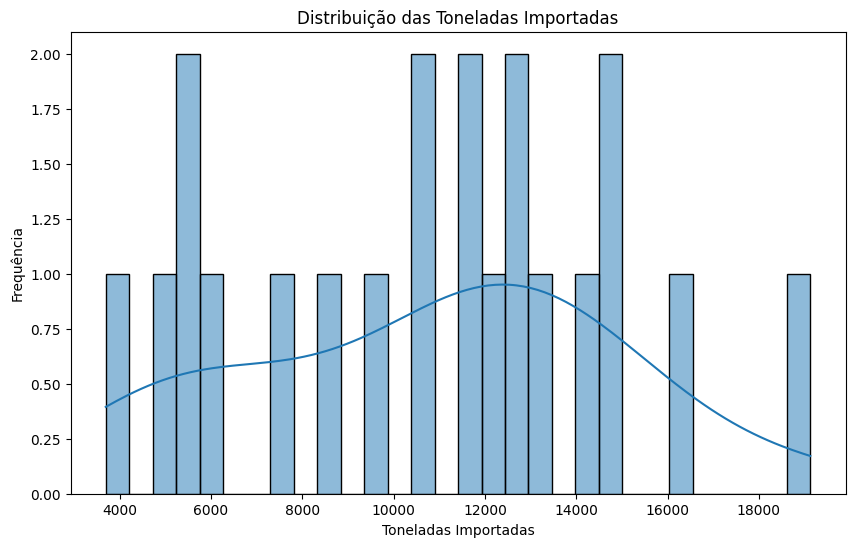

In [261]:
importacoes_por_data = base_analitica.groupby('Data')['Ton_total'].sum().reset_index()

# Distribuição das toneladas importadas
plt.figure(figsize=(10, 6))
sns.histplot(importacoes_por_data['Ton_total'], bins=30, kde=True)
plt.title('Distribuição das Toneladas Importadas')
plt.xlabel('Toneladas Importadas')
plt.ylabel('Frequência')
plt.show()

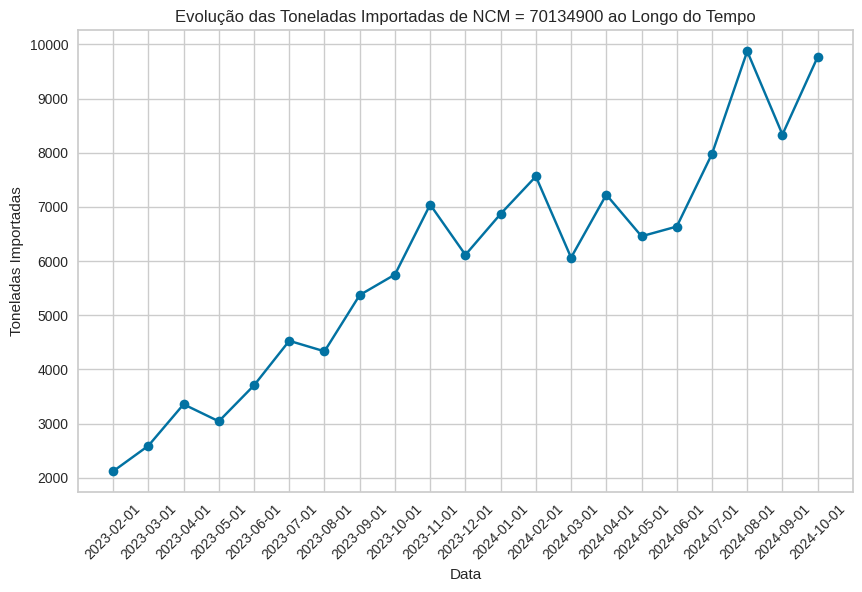

In [63]:
# Plotando a evolução ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(base_analitica[base_analitica['NCM'] == 70134900]['Data'], base_analitica[base_analitica['NCM'] == 70134900]['Ton_total'], marker='o', linestyle='-', color='b')
plt.title('Evolução das Toneladas Importadas de NCM = 70134900 ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Toneladas Importadas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

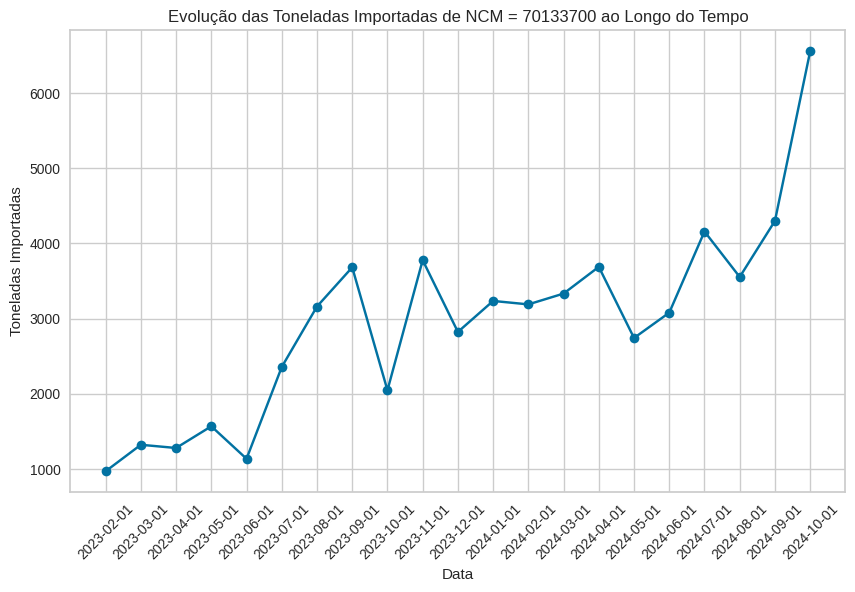

In [66]:
# Plotando a evolução ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(base_analitica[base_analitica['NCM'] == 70133700]['Data'], base_analitica[base_analitica['NCM'] == 70133700]['Ton_total'], marker='o', linestyle='-', color='b')
plt.title('Evolução das Toneladas Importadas de NCM = 70133700 ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Toneladas Importadas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

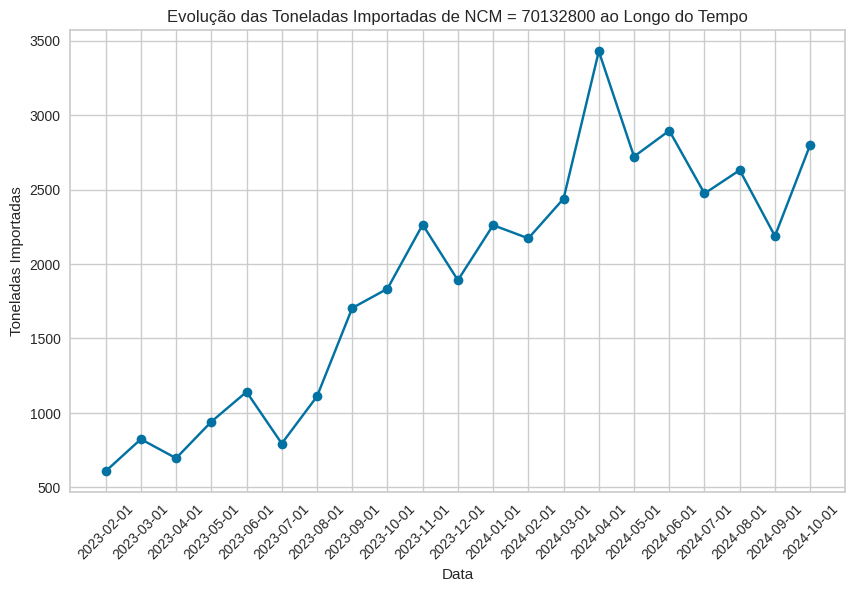

In [67]:
# Plotando a evolução ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(base_analitica[base_analitica['NCM'] == 70132800]['Data'], base_analitica[base_analitica['NCM'] == 70132800]['Ton_total'], marker='o', linestyle='-', color='b')
plt.title('Evolução das Toneladas Importadas de NCM = 70132800 ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Toneladas Importadas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Plotando a evolução ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(importacoes_por_data['Data'], importacoes_por_data['Ton_total'], marker='o', linestyle='-', color='b')
plt.title('Evolução das Toneladas Importadas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Toneladas Importadas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [263]:
base_analitica.columns

Index(['Data', 'NCM', 'TPD_total', 'TPD_avg', 'WoE_Regiao_avg', 'WoE_Pais_avg',
       'Num_Paises', 'USD_total_1m_avg', 'USD_total_1m_max',
       'USD_total_1m_min', 'Ton_total_1m_avg', 'Ton_total_1m_max',
       'Ton_total_1m_min', 'USD_total_3m_avg', 'USD_total_3m_max',
       'USD_total_3m_min', 'Ton_total_3m_avg', 'Ton_total_3m_max',
       'Ton_total_3m_min', 'USD_total_6m_avg', 'USD_total_6m_max',
       'USD_total_6m_min', 'Ton_total_6m_avg', 'Ton_total_6m_max',
       'Ton_total_6m_min', 'Ton_total', 'Total_6_Meses_Valor Vendido (R$)',
       'Min_6_Meses_Valor Vendido (R$)', 'Max_6_Meses_Valor Vendido (R$)',
       'Media_6_Meses_Valor Vendido (R$)', 'Total_3_Meses_Valor Vendido (R$)',
       'Min_3_Meses_Valor Vendido (R$)', 'Max_3_Meses_Valor Vendido (R$)',
       'Media_3_Meses_Valor Vendido (R$)', 'Total_1_Mes_Valor Vendido (R$)',
       'Total_6_Meses_Qtd Vendida (u)', 'Min_6_Meses_Qtd Vendida (u)',
       'Max_6_Meses_Qtd Vendida (u)', 'Media_6_Meses_Qtd Vendida (u)',


In [265]:
base_analitica = base_analitica[['Data', 'NCM', 'TPD_total', 'TPD_avg', 'WoE_Regiao_avg', 'WoE_Pais_avg',
       'Num_Paises', 'USD_total_1m_avg', 'USD_total_1m_max',
       'USD_total_1m_min', 'Ton_total_1m_avg', 'Ton_total_1m_max',
       'Ton_total_1m_min', 'USD_total_3m_avg', 'USD_total_3m_max',
       'USD_total_3m_min', 'Ton_total_3m_avg', 'Ton_total_3m_max',
       'Ton_total_3m_min', 'USD_total_6m_avg', 'USD_total_6m_max',
       'USD_total_6m_min', 'Ton_total_6m_avg', 'Ton_total_6m_max',
       'Ton_total_6m_min', 'Total_6_Meses_Valor Vendido (R$)',
       'Min_6_Meses_Valor Vendido (R$)', 'Max_6_Meses_Valor Vendido (R$)',
       'Media_6_Meses_Valor Vendido (R$)', 'Total_3_Meses_Valor Vendido (R$)',
       'Min_3_Meses_Valor Vendido (R$)', 'Max_3_Meses_Valor Vendido (R$)',
       'Media_3_Meses_Valor Vendido (R$)', 'Total_1_Mes_Valor Vendido (R$)',
       'Total_6_Meses_Qtd Vendida (u)', 'Min_6_Meses_Qtd Vendida (u)',
       'Max_6_Meses_Qtd Vendida (u)', 'Media_6_Meses_Qtd Vendida (u)',
       'Total_3_Meses_Qtd Vendida (u)', 'Min_3_Meses_Qtd Vendida (u)',
       'Max_3_Meses_Qtd Vendida (u)', 'Media_3_Meses_Qtd Vendida (u)',
       'Total_1_Mes_Qtd Vendida (u)', 'Total_6_Meses_Ton_Vendido',
       'Min_6_Meses_Ton_Vendido', 'Max_6_Meses_Ton_Vendido',
       'Media_6_Meses_Ton_Vendido', 'Total_3_Meses_Ton_Vendido',
       'Min_3_Meses_Ton_Vendido', 'Max_3_Meses_Ton_Vendido',
       'Media_3_Meses_Ton_Vendido', 'Total_1_Mes_Ton_Vendido',
       'Valor_por_Qtd_Vendida_ultimo_1_mes',
       'Valor_por_Qtd_Vendida_ultimo_3_meses',
       'Valor_por_Qtd_Vendida_ultimo_6_meses',
       'Valor_por_Ton_Vendida_ultimo_1_mes',
       'Valor_por_Ton_Vendida_ultimo_3_meses',
       'Valor_por_Ton_Vendida_ultimo_6_meses',
       'Kg_por_Qtd_Vendida_ultimo_1_mes', 'Kg_por_Qtd_Vendida_ultimo_3_meses',
       'Kg_por_Qtd_Vendida_ultimo_6_meses', 'Ton_total']]

base_analitica

,Data,NCM,TPD_total,TPD_avg,WoE_Regiao_avg,WoE_Pais_avg,Num_Paises,USD_total_1m_avg,USD_total_1m_max,USD_total_1m_min,...,Valor_por_Qtd_Vendida_ultimo_1_mes,Valor_por_Qtd_Vendida_ultimo_3_meses,Valor_por_Qtd_Vendida_ultimo_6_meses,Valor_por_Ton_Vendida_ultimo_1_mes,Valor_por_Ton_Vendida_ultimo_3_meses,Valor_por_Ton_Vendida_ultimo_6_meses,Kg_por_Qtd_Vendida_ultimo_1_mes,Kg_por_Qtd_Vendida_ultimo_3_meses,Kg_por_Qtd_Vendida_ultimo_6_meses,Ton_total
3,2023-02-01,70132800,168173.05,14014.420833,-35.364808,-15.159159,12,1917659.0,1917659.0,1917659.0,...,17.55,17.55,17.55,84694.06,84694.06,84694.06,0.21,0.21,0.21,608.26
4,2023-02-01,70133700,201622.40,14401.600000,-51.337942,-32.353314,14,1444947.0,1444947.0,1444947.0,...,10.62,10.62,10.62,53253.39,53253.39,53253.39,0.20,0.20,0.20,969.52
5,2023-02-01,70134900,171953.40,12282.385714,-2.652775,-33.231984,14,3220413.0,3220413.0,3220413.0,...,19.02,19.02,19.02,33396.41,33396.41,33396.41,0.57,0.57,0.57,2120.67
6,2023-03-01,70132800,135037.40,12276.127273,-25.200085,1.728966,11,1392469.0,1392469.0,1392469.0,...,17.63,17.59,17.59,85074.42,84884.24,84884.24,0.21,0.21,0.21,824.00
7,2023-03-01,70133700,178568.40,14880.700000,-35.364808,-8.182036,12,1043191.0,1043191.0,1043191.0,...,10.82,10.72,10.72,54255.50,53754.44,53754.44,0.20,0.20,0.20,1322.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-09-01,70133700,214860.40,13428.775000,0.715497,-47.911088,16,2793007.0,2793007.0,2793007.0,...,12.36,10.67,10.38,61982.19,53544.12,52096.73,0.20,0.20,0.20,4300.91
62,2024-09-01,70134900,216504.40,14433.626667,10.860865,-39.580096,15,8046367.0,8046367.0,8046367.0,...,22.70,21.53,20.17,39040.01,38795.15,37978.29,0.58,0.55,0.53,8335.24
63,2024-10-01,70132800,171505.40,13192.723077,-17.915570,-22.869826,13,2776880.0,2776880.0,2776880.0,...,24.39,24.91,21.70,117629.76,120265.08,104812.24,0.21,0.21,0.21,2800.59
64,2024-10-01,70133700,234919.40,13818.788235,-7.984047,-52.303182,17,3560653.0,3560653.0,3560653.0,...,12.85,11.87,10.74,64438.50,59518.96,53870.01,0.20,0.20,0.20,6557.56


In [266]:
base_analitica.to_csv('base_analitica_completa.csv', sep = ',')

In [17]:
# Lendo todas as abas do arquivo da comextat
base_analitica = pd.read_csv('/content/drive/MyDrive/TCC/base_analitica_completa.csv', sep = ',', index_col=None)
base_analitica = base_analitica.drop(columns=["Unnamed: 0"])
base_analitica.head()

,Data,NCM,TPD_total,TPD_avg,WoE_Regiao_avg,WoE_Pais_avg,Num_Paises,USD_total_1m_avg,USD_total_1m_max,USD_total_1m_min,...,Valor_por_Qtd_Vendida_ultimo_1_mes,Valor_por_Qtd_Vendida_ultimo_3_meses,Valor_por_Qtd_Vendida_ultimo_6_meses,Valor_por_Ton_Vendida_ultimo_1_mes,Valor_por_Ton_Vendida_ultimo_3_meses,Valor_por_Ton_Vendida_ultimo_6_meses,Kg_por_Qtd_Vendida_ultimo_1_mes,Kg_por_Qtd_Vendida_ultimo_3_meses,Kg_por_Qtd_Vendida_ultimo_6_meses,Ton_total
0,2023-02-01,70132800,168173.05,14014.420833,-35.364808,-15.159159,12,1917659.0,1917659.0,1917659.0,...,17.55,17.55,17.55,84694.06,84694.06,84694.06,0.21,0.21,0.21,608.26
1,2023-02-01,70133700,201622.40,14401.600000,-51.337942,-32.353314,14,1444947.0,1444947.0,1444947.0,...,10.62,10.62,10.62,53253.39,53253.39,53253.39,0.20,0.20,0.20,969.52
2,2023-02-01,70134900,171953.40,12282.385714,-2.652775,-33.231984,14,3220413.0,3220413.0,3220413.0,...,19.02,19.02,19.02,33396.41,33396.41,33396.41,0.57,0.57,0.57,2120.67
3,2023-03-01,70132800,135037.40,12276.127273,-25.200085,1.728966,11,1392469.0,1392469.0,1392469.0,...,17.63,17.59,17.59,85074.42,84884.24,84884.24,0.21,0.21,0.21,824.00
4,2023-03-01,70133700,178568.40,14880.700000,-35.364808,-8.182036,12,1043191.0,1043191.0,1043191.0,...,10.82,10.72,10.72,54255.50,53754.44,53754.44,0.20,0.20,0.20,1322.04


In [18]:
missing_values = base_analitica.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [22]:
base_analitica['NCM'].unique()

array([70132800, 70133700, 70134900])

# Vamos começar testando alguns modelos

### Normalização MINMAX

,Description,Value
0,Session id,123
1,Target,Ton_total
2,Target type,Regression
3,Original data shape,"(63, 62)"
4,Transformed data shape,"(63, 61)"
5,Transformed train set shape,"(44, 61)"
6,Transformed test set shape,"(19, 61)"
7,Ignore features,1
8,Numeric features,60
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,648.5972,670861.8159,743.4994,0.8074,0.2249,0.2095,0.0610
huber,Huber Regressor,595.6508,674004.8871,714.6113,0.7939,0.2321,0.1888,0.0630
br,Bayesian Ridge,644.0903,699338.5246,745.9352,0.7937,0.2259,0.2098,0.0360
omp,Orthogonal Matching Pursuit,655.6265,760423.3264,774.1300,0.7918,0.2666,0.2306,0.0350
rf,Random Forest Regressor,706.2976,873798.7179,843.8361,0.7762,0.2481,0.2191,0.2010
et,Extra Trees Regressor,655.6484,835843.3891,803.2461,0.7730,0.2345,0.2046,0.1690
en,Elastic Net,798.6934,1086594.4971,951.8124,0.7628,0.3089,0.2942,0.0360
par,Passive Aggressive Regressor,763.5523,991986.8693,922.2434,0.7579,0.2676,0.2242,0.0330
llar,Lasso Least Angle Regression,750.6996,850911.1941,865.7696,0.7440,0.3182,0.2535,0.0410
dt,Decision Tree Regressor,772.3681,1044448.6624,962.8009,0.7432,0.3014,0.2607,0.0340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

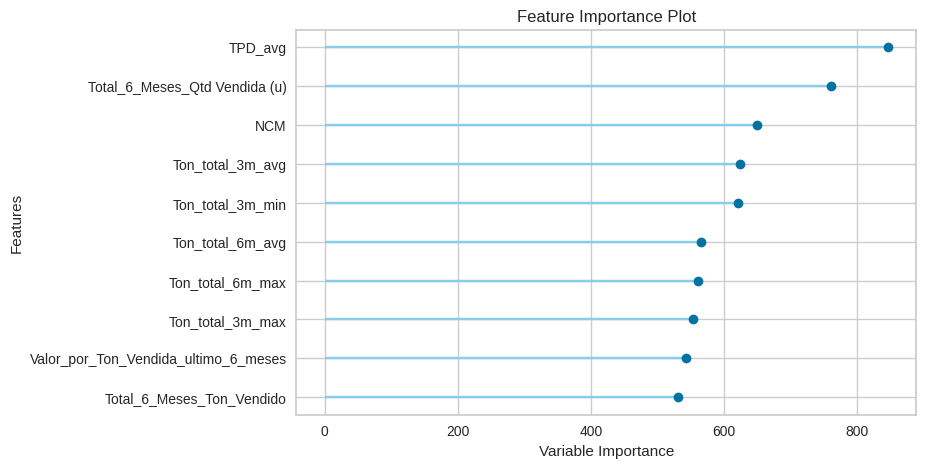

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NCM', 'TPD_total', 'TPD_avg',
                                              'WoE_Regiao_avg', 'WoE_Pais_avg',
                                              'Num_Paises', 'USD_total_1m_avg',
                                              'USD_total_1m_max',
                                              'USD_total_1m_min',
                                              'Ton_total_1m_avg',
                                              'Ton_total_1m_max',
                                              'Ton_total_1m_min',
                                              'USD_total_3m_avg',
                                              'USD_total_3m_max',
                                              'USD_total_3m_min',
                                              'Ton_total_3...
                                              'Min_3_Meses_Valor Vendido (R$)', ...],
        

In [163]:
from pycaret.regression import *

# Inicialize o ambiente de configuração do PyCaret
# 'Ton_total' é a variável alvo. Substitua por seu nome exato.
regression_setup = setup(data=base_analitica,
                         target='Ton_total',
                         train_size = 0.7,
                         session_id=123,
                         normalize=True,
                         normalize_method = 'minmax',
                         n_features_to_select = None,
                         ignore_features=['Data'])  # Ignore a coluna de data se não for diretamente utilizável

# Compare modelos para encontrar o mais adequado
best_model = compare_models()

# Visualize a importância das variáveis para o melhor modelo
plot_model(best_model, plot='feature')

# Se desejar salvar o modelo
save_model(best_model, 'melhor_modelo_pycaret')

In [164]:
best_model

Ridge(random_state=123)

In [165]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge, BayesianRidge
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data_filtrada = base_analitica

# Definir as variáveis independentes (X) e dependente (y)
X = data_filtrada.drop(['Ton_total', 'Data'], axis=1)  # Excluindo 'Ton_total' (variável alvo) e 'Data'
y = data_filtrada['Ton_total']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

# Normalizar os dados com MinMax
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para calcular as métricas de avaliação
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predições para o treino
    y_train_pred = model.predict(X_train)
    # Predições para o teste
    y_test_pred = model.predict(X_test)

    # Métricas para o treino
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Métricas para o teste
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    return (mae_train, mse_train, rmse_train, r2_train), (mae_test, mse_test, rmse_test, r2_test)

# Lasso
lasso = Lasso()
lasso_param_grid = {'alpha': np.logspace(-5, 1, 10)}  # Busca para o parâmetro alpha
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)  # Ajustar o GridSearchCV aos dados
lasso_best_model = lasso_grid_search.best_estimator_

# Bayesian Ridge
br = BayesianRidge()
br_param_grid = {'alpha_1': np.logspace(-5, 1, 10), 'alpha_2': np.logspace(-5, 1, 10)}
br_grid_search = GridSearchCV(br, br_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
br_grid_search.fit(X_train, y_train)  # Ajustar o GridSearchCV aos dados
br_best_model = br_grid_search.best_estimator_

# Ridge
ridge = Ridge()
ridge_param_grid = {'alpha': np.logspace(-5, 1, 10)}  # Busca para o parâmetro alpha
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)  # Ajustar o GridSearchCV aos dados
ridge_best_model = ridge_grid_search.best_estimator_

# Orthogonal Matching Pursuit
omp = OrthogonalMatchingPursuit()
omp_param_grid = {'n_nonzero_coefs': [5, 10, 15, 20]}  # Ajuste conforme necessário
omp_grid_search = GridSearchCV(omp, omp_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
omp_grid_search.fit(X_train, y_train)  # Ajustar o GridSearchCV aos dados
omp_best_model = omp_grid_search.best_estimator_


In [166]:
# Inicialize o dicionário 'results' para armazenar os resultados
results = {}

# Avaliar o Lasso
results['Lasso'] = evaluate_model(lasso_best_model, X_train, y_train, X_test, y_test)

# Avaliar o Bayesian Ridge
results['Bayesian Ridge'] = evaluate_model(br_best_model, X_train, y_train, X_test, y_test)

# Avaliar o Ridge
results['Ridge'] = evaluate_model(ridge_best_model, X_train, y_train, X_test, y_test)

# Avaliar o Orthogonal Matching Pursuit
results['OMP'] = evaluate_model(omp_best_model, X_train, y_train, X_test, y_test)

# Exibir resultados em formato legível
for model_name, (train_metrics, test_metrics) in results.items():
    print(f'{model_name} - Treino:')
    print(f'MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}')
    print(f'{model_name} - Teste:')
    print(f'MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}')
    print('---')



Lasso - Treino:
MAE: 398.6469, MSE: 286356.7183, RMSE: 535.1231, R²: 0.9459
Lasso - Teste:
MAE: 486.4448, MSE: 389922.5001, RMSE: 624.4377, R²: 0.9127
---
Bayesian Ridge - Treino:
MAE: 378.3585, MSE: 248564.9162, RMSE: 498.5629, R²: 0.9530
Bayesian Ridge - Teste:
MAE: 515.6785, MSE: 400776.4631, RMSE: 633.0691, R²: 0.9103
---
Ridge - Treino:
MAE: 398.6850, MSE: 269037.3265, RMSE: 518.6881, R²: 0.9492
Ridge - Teste:
MAE: 511.6230, MSE: 387768.5795, RMSE: 622.7107, R²: 0.9132
---
OMP - Treino:
MAE: 416.6582, MSE: 276554.5962, RMSE: 525.8846, R²: 0.9478
OMP - Teste:
MAE: 573.6511, MSE: 470061.7365, RMSE: 685.6105, R²: 0.8948
---


1. Lasso
Treino: O modelo tem um bom desempenho no treino (R² = 0.9547), com erro moderado (MAE = 370.40).
Teste: No teste, o modelo ainda se sai bem (R² = 0.8942), mas o erro aumenta um pouco (MAE = 466.72), indicando uma leve queda na capacidade de generalização.
2. Bayesian Ridge
Treino: Similar ao Lasso, o modelo tem um desempenho excelente no treino (R² = 0.9579), com um MAE de 369.19.
Teste: No teste, o desempenho ainda é bom, com R² = 0.9133, embora haja um aumento no erro (MAE = 433.83). Esse aumento é um pouco menor que o do Lasso, sugerindo uma ligeira vantagem do Bayesian Ridge em relação ao Lasso.
3. Ridge
Treino: O desempenho do Ridge é praticamente igual ao do Bayesian Ridge (R² = 0.9579).
Teste: O desempenho no teste também é muito bom (R² = 0.9133), com um aumento no erro similar ao do Bayesian Ridge. Não há uma diferença significativa entre o Ridge e o Bayesian Ridge em termos de desempenho.
4. Orthogonal Matching Pursuit (OMP)
Treino: O OMP apresenta o melhor desempenho no treino (R² = 0.9657), com o menor MAE (329.80), indicando que o modelo consegue ajustar bem aos dados de treino.
Teste: No entanto, no teste, o OMP apresenta uma grande queda no desempenho (R² = 0.8323) e um MAE significativamente mais alto (557.78). Isso sugere que o modelo está overfitting (ajustando-se demais aos dados de treino e não generalizando bem para os dados de teste).
Análise de Overfitting/Underfitting:
Overfitting: O modelo OMP parece ser o principal candidato ao overfitting, pois tem um ótimo desempenho no treino, mas uma grande queda no desempenho no teste. Isso significa que ele foi excessivamente ajustado aos dados de treino e não consegue generalizar bem para os dados de teste.
Underfitting: Nenhum dos modelos parece estar underfitting (com um desempenho ruim tanto no treino quanto no teste). Todos têm um bom desempenho no treino e ainda se saem bem no teste, embora alguns apresentem uma leve diminuição do desempenho no teste, o que é normal.
Recomendações:
Lasso, Bayesian Ridge e Ridge são bons candidatos para um modelo robusto, pois eles têm um desempenho relativamente bom tanto no treino quanto no teste, sem grandes sinais de overfitting.
OMP, devido ao overfitting, pode não ser a melhor escolha. Talvez uma regularização mais forte ou um modelo diferente poderia ajudar a melhorar a capacidade de generalização.

Métricas de Desempenho dos Modelos:
Lasso Regression (lasso):

R²: 0.7416
RMSE: 790.39
MAE: 620.81
MSE: 709,464.36
Bayesian Ridge (br):

R²: 0.7180
RMSE: 736.65
MAE: 616.25
MSE: 626,903.44
Ridge Regression (ridge):

R²: 0.7165
RMSE: 721.41
MAE: 602.26
MSE: 606,290.64
Orthogonal Matching Pursuit (omp):

R²: 0.7077
RMSE: 684.89
MAE: 526.88
MSE: 522,931.86
Análise dos Modelos:
Lasso Regression (lasso): Com R² de 0.7416 e um RMSE de 790.39, o modelo apresenta um desempenho bom em relação aos outros, mas pode ser melhorado dependendo das suas necessidades. Esse modelo parece equilibrado entre a complexidade e o desempenho.

Bayesian Ridge (br): Este modelo tem um desempenho semelhante ao do Lasso, com um R² de 0.7180 e RMSE de 736.65. Ele pode ser uma boa opção, dependendo da situação.

Ridge Regression (ridge): Com R² de 0.7165 e RMSE de 721.41, o Ridge apresenta resultados bem próximos aos do Bayesian Ridge. Pode ser uma boa escolha para quando uma regularização mais forte for necessária.

Orthogonal Matching Pursuit (omp): Esse modelo tem o R² mais baixo (0.7077) entre os quatro, mas um RMSE relativamente baixo (684.89), o que o torna interessante dependendo dos seus critérios de desempenho. Ele parece ser um pouco mais robusto em termos de erro absoluto.

Conclusão:
Os modelos Lasso e Bayesian Ridge se destacam com o maior R² e um erro relativamente baixo. Se a principal métrica de interesse for o R², o Lasso parece ser o melhor modelo. Se o objetivo for reduzir o erro absoluto, o Orthogonal Matching Pursuit pode ser uma boa escolha.

Se você quiser tentar mais algum ajuste ou comparar mais modelos, estou à disposição!

### Sem Normalização:

,Description,Value
0,Session id,123
1,Target,Ton_total
2,Target type,Regression
3,Original data shape,"(57, 62)"
4,Transformed data shape,"(57, 61)"
5,Transformed train set shape,"(39, 61)"
6,Transformed test set shape,"(18, 61)"
7,Ignore features,1
8,Numeric features,60
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,612.2480,610623.4601,741.8549,0.7218,0.3162,0.2400,0.0280
par,Passive Aggressive Regressor,765.5777,1147151.2894,933.8544,0.7010,0.3857,0.3104,0.0290
knn,K Neighbors Regressor,639.6004,1014686.4078,864.2158,0.6726,0.2640,0.2110,0.0260
br,Bayesian Ridge,642.9124,700959.4017,796.0220,0.6474,0.2654,0.2249,0.0330
en,Elastic Net,821.4273,1119072.9610,972.6427,0.6139,0.4354,0.3090,0.0320
huber,Huber Regressor,736.7239,900679.4963,887.8323,0.5709,0.3057,0.2421,0.0600
rf,Random Forest Regressor,664.3175,752960.2365,783.2831,0.5281,0.2664,0.2451,0.3320
et,Extra Trees Regressor,684.0658,820591.9003,828.6283,0.5096,0.2666,0.2424,0.2700
ada,AdaBoost Regressor,679.1227,813002.1725,809.1643,0.4703,0.2795,0.2536,0.0990
xgboost,Extreme Gradient Boosting,834.5984,1688584.3719,1100.1433,0.4210,0.3197,0.2652,0.1350


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

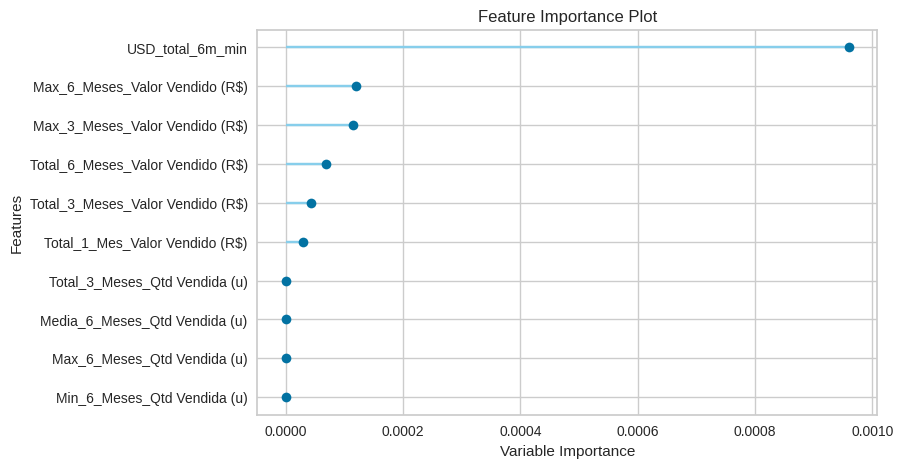

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NCM', 'TPD_total', 'TPD_avg',
                                              'WoE_Regiao_avg', 'WoE_Pais_avg',
                                              'Num_Paises', 'USD_total_1m_avg',
                                              'USD_total_1m_max',
                                              'USD_total_1m_min',
                                              'Ton_total_1m_avg',
                                              'Ton_total_1m_max',
                                              'Ton_total_1m_min',
                                              'USD_total_3m_avg',
                                              'USD_total_3m_max',
                                              'USD_total_3m_min',
                                              'Ton_total_3...
                                              'Media_6_Meses_Valor Vendido (R$)',
            

In [158]:

# Inicialize o ambiente de configuração do PyCaret
# 'Ton_total' é a variável alvo. Substitua por seu nome exato.
regression_setup = setup(data=base_analitica[(base_analitica['Data'] >= '2023-02-01') & (base_analitica['Data'] <= '2024-08-01')],
                         target='Ton_total',
                         train_size = 0.7,
                         session_id=123,
                         normalize=False,
                         n_features_to_select = None,
                         ignore_features=['Data'])  # Ignore a coluna de data se não for diretamente utilizável

# Compare modelos para encontrar o mais adequado
best_model = compare_models()

# Visualize a importância das variáveis para o melhor modelo
plot_model(best_model, plot='feature')

# Se desejar salvar o modelo
save_model(best_model, 'melhor_modelo_pycaret')

Métricas de Desempenho dos Modelos (Sem Normalização):
Orthogonal Matching Pursuit (omp):

R²: 0.7218
RMSE: 741.85
MAE: 612.25
MSE: 610,623.46
Passive Aggressive Regressor (par):

R²: 0.7010
RMSE: 933.85
MAE: 765.58
MSE: 1,147,151.29
K Neighbors Regressor (knn):

R²: 0.6726
RMSE: 864.22
MAE: 639.60
MSE: 1,014,686.41
Análise:
Orthogonal Matching Pursuit (omp): O modelo apresenta R² de 0.7218 e RMSE de 741.85. Mesmo sem a normalização, ele ainda parece ser um modelo bem equilibrado, com um bom desempenho geral.

Passive Aggressive Regressor (par): Embora tenha um R² de 0.7010, o modelo apresenta o maior RMSE e MSE, o que indica que ele está cometendo erros maiores em comparação com o omp. Isso pode ser um reflexo da maior sensibilidade do modelo a variações no dado sem normalização.

K Neighbors Regressor (knn): Com R² de 0.6726 e RMSE de 864.22, o desempenho do knn é mais baixo que o do omp, o que pode ser esperado, já que o modelo KNN depende muito das distâncias entre as observações, sendo sensível a escalas de variáveis.

Conclusão:
Sem a normalização, o Orthogonal Matching Pursuit (omp) continua sendo o modelo mais equilibrado, com o melhor R² e um RMSE razoável. O K Neighbors Regressor (knn) e o Passive Aggressive Regressor (par) têm resultados um pouco mais fracos, com RMSE mais altos e menor R².

In [150]:
# Predições para o treino usando dados escalonados
y_pred_train_lasso = best_lasso_model.predict(X_train_scaled)

# Métricas para o treino
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)

# Exibir as métricas de treino e teste
print(f'Métricas de Avaliação - Lasso:')
print(f'Treino - MAE: {mae_train_lasso:.4f}, MSE: {mse_train_lasso:.4f}, RMSE: {rmse_train_lasso:.4f}, R²: {r2_train_lasso:.4f}')
print(f'Teste - MAE: {mae_lasso:.4f}, MSE: {mse_lasso:.4f}, RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.4f}')

Métricas de Avaliação - Lasso:
Treino - MAE: 611.0721, MSE: 550821.8295, RMSE: 742.1737, R²: 0.8172
Teste - MAE: 1438.2217, MSE: 3287762.8893, RMSE: 1813.2189, R²: -0.8276


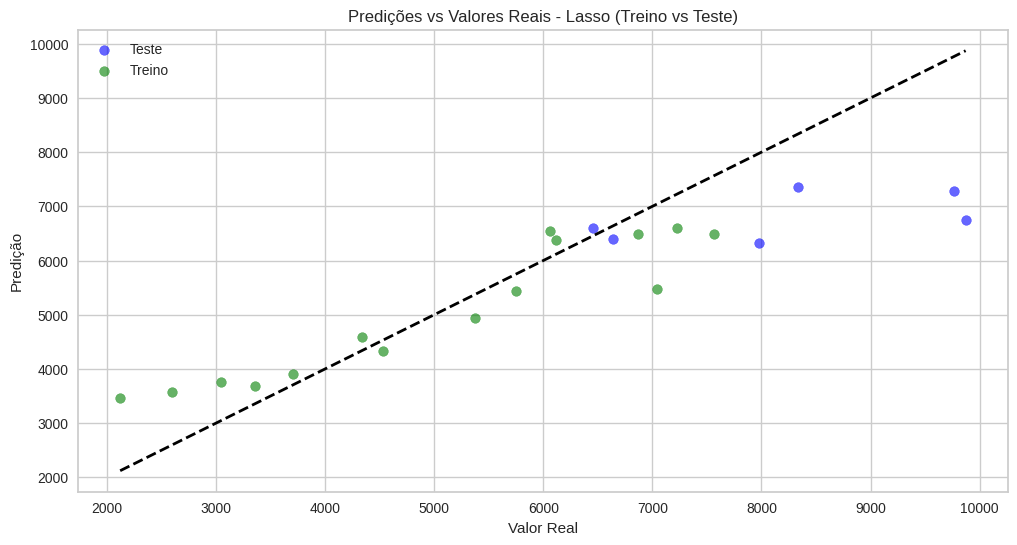

In [134]:
# Predições no conjunto de treino
y_pred_train_lasso = best_lasso_model.predict(X_train_scaled)

# Gráfico de Predições vs Valores Reais (Treino e Teste)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6, label='Teste')
plt.scatter(y_train, y_pred_train_lasso, color='green', alpha=0.6, label='Treino')
plt.plot([min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
         [min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
         color='black', lw=2, ls='--')
plt.title('Predições vs Valores Reais - Lasso (Treino vs Teste)')
plt.xlabel('Valor Real')
plt.ylabel('Predição')
plt.legend()
plt.show()



In [103]:
y_train

,Ton_total
2,2120.67
5,2591.35
8,3356.89
11,3042.51
14,3706.46
17,4528.28
20,4334.26
23,5373.04
26,5750.86
29,7042.33


In [104]:
y_test

,Ton_total
47,6457.90
50,6637.19
53,7977.89
56,9872.02
59,8335.24
62,9767.46


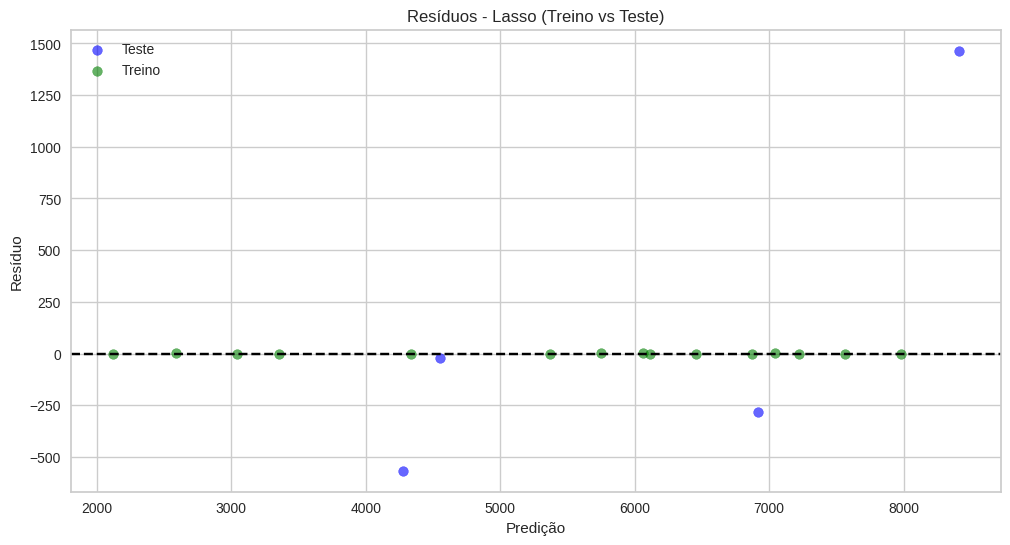

In [74]:
# Resíduos para o treino
residuals_train_lasso = y_train - y_pred_train_lasso

# Gráfico de Resíduos (Treino e Teste)
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_lasso, residuals_lasso, color='blue', alpha=0.6, label='Teste')
plt.scatter(y_pred_train_lasso, residuals_train_lasso, color='green', alpha=0.6, label='Treino')
plt.axhline(0, color='black', linestyle='--')
plt.title('Resíduos - Lasso (Treino vs Teste)')
plt.xlabel('Predição')
plt.ylabel('Resíduo')
plt.legend()
plt.show()


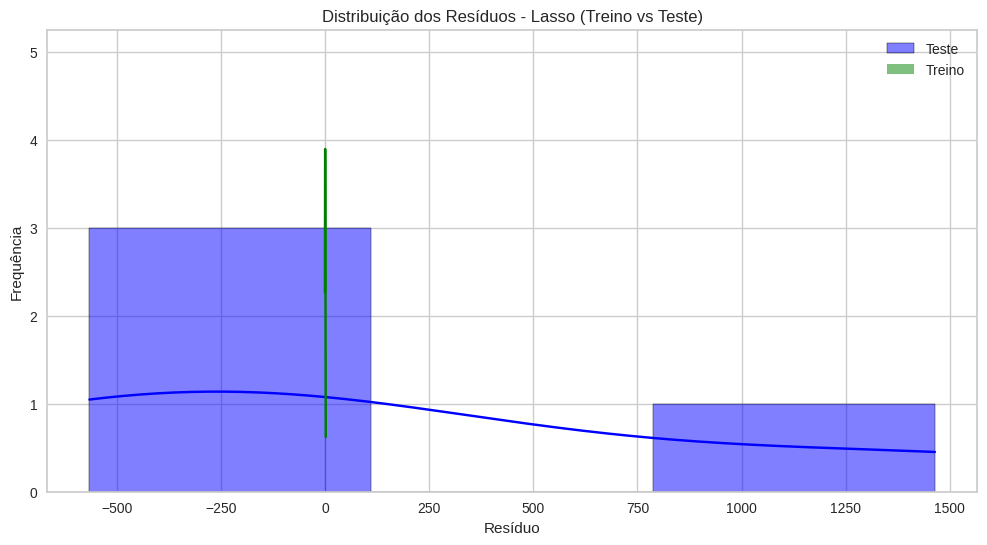

In [75]:
# Distribuição dos resíduos (Treino e Teste)
plt.figure(figsize=(12, 6))
sns.histplot(residuals_lasso, kde=True, color='blue', label='Teste')
sns.histplot(residuals_train_lasso, kde=True, color='green', label='Treino')
plt.title('Distribuição dos Resíduos - Lasso (Treino vs Teste)')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.legend()
plt.show()


In [54]:
best_lasso_model

Lasso(alpha=4.641588833612782e-05)

In [71]:
# Criando o modelo Orthogonal Matching Pursuit
omp = OrthogonalMatchingPursuit()

# Definir os parâmetros para tunar
param_grid_omp = {
    'n_nonzero_coefs': [2, 5],  # Ajuste conforme necessário
    'tol': [0.001, 0.01]
}
# Realizar a busca por grid
grid_search_omp = GridSearchCV(omp, param_grid_omp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Treinando o modelo e cronometrando o tempo de treinamento
start_time = time.time()
grid_search_omp.fit(X_train, y_train)
training_time_omp = time.time() - start_time

# Melhor modelo OMP
best_omp_model = grid_search_omp.best_estimator_

# Predições e Cálculo das Métricas
y_pred_omp = best_omp_model.predict(X_test)

# Métricas de Avaliação
mae_omp = mean_absolute_error(y_test, y_pred_omp)
mse_omp = mean_squared_error(y_test, y_pred_omp)
rmse_omp = np.sqrt(mse_omp)
r2_omp = r2_score(y_test, y_pred_omp)
rmsle_omp = np.sqrt(np.mean(np.log1p(y_test) - np.log1p(y_pred_omp))**2)
mape_omp = mean_absolute_percentage_error(y_test, y_pred_omp)

# Exibir as métricas
print(f"OMP Metrics:")
print(f"MAE: {mae_omp:.4f}")
print(f"MSE: {mse_omp:.4f}")
print(f"RMSE: {rmse_omp:.4f}")
print(f"R²: {r2_omp:.4f}")
print(f"RMSLE: {rmsle_omp:.4f}")
print(f"MAPE: {mape_omp:.4f}")
print(f"Training Time: {training_time_omp:.4f} seconds")


OMP Metrics:
MAE: 4332.4624
MSE: 47945770.5980
RMSE: 6924.2885
R²: -7.4536
RMSLE: 0.3313
MAPE: 0.5512
Training Time: 0.2170 seconds


In [68]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

ElasticNet()

,Description,Value
0,Session id,123
1,Target,Ton_total
2,Target type,Regression
3,Original data shape,"(19, 62)"
4,Transformed data shape,"(19, 61)"
5,Transformed train set shape,"(15, 61)"
6,Transformed test set shape,"(4, 61)"
7,Ignore features,1
8,Numeric features,60
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1617.6650,5440258.7712,1766.8075,nan,0.7088,0.8907,0.0340
lasso,Lasso Regression,787.8190,930621.7788,844.7457,nan,0.3346,0.3145,0.0380
ridge,Ridge Regression,695.9110,757171.6862,741.9772,nan,0.2887,0.3172,0.0360
en,Elastic Net,743.8271,777917.4940,785.9958,nan,0.3252,0.3624,0.0330
lar,Least Angle Regression,92963340684957303016090798809686212608.0000,86421826821862066998122369545911564133834026217804171686808147582522432159744.0000,92963340685146518796326419754108583936.0000,nan,35.9662,22349803200240555731970302391877632.0000,0.0400
llar,Lasso Least Angle Regression,778.7771,1051498.6737,854.9506,nan,0.3242,0.3304,0.0430
omp,Orthogonal Matching Pursuit,966.1327,1460592.5892,1072.8799,nan,0.4674,0.3554,0.0320
br,Bayesian Ridge,767.9715,814054.6199,809.6497,nan,0.3361,0.3775,0.0400
par,Passive Aggressive Regressor,821.7985,1095365.1655,893.2720,nan,0.3555,0.3596,0.0390
huber,Huber Regressor,949.2111,2251002.6938,1052.2603,nan,0.4459,0.5192,0.0660


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

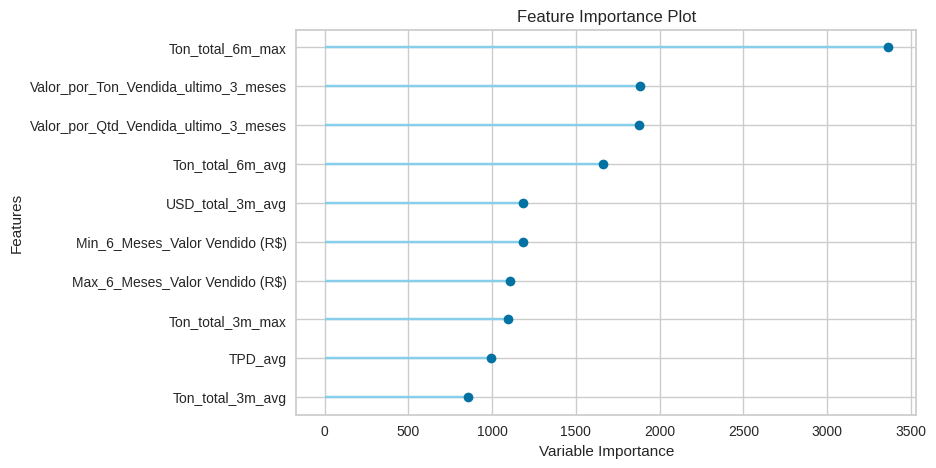

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NCM', 'TPD_total', 'TPD_avg',
                                              'WoE_Regiao_avg', 'WoE_Pais_avg',
                                              'Num_Paises', 'USD_total_1m_avg',
                                              'USD_total_1m_max',
                                              'USD_total_1m_min',
                                              'Ton_total_1m_avg',
                                              'Ton_total_1m_max',
                                              'Ton_total_1m_min',
                                              'USD_total_3m_avg',
                                              'USD_total_3m_max',
                                              'USD_total_3m_min',
                                              'Ton_total_3...
                                              'Min_3_Meses_Valor Vendido (R$)', ...],
        

In [24]:
from pycaret.regression import *

# Inicialize o ambiente de configuração do PyCaret
# 'Ton_total' é a variável alvo. Substitua por seu nome exato.
regression_setup = setup(data=base_analitica[(base_analitica['Data'] >= '2023-02-01') & (base_analitica['Data'] <= '2024-08-01') & (base_analitica['NCM'] == 70133700)],
                         target='Ton_total',
                         train_size = 0.8,
                         session_id=123,
                         normalize=True,
                         normalize_method = 'minmax',
                         n_features_to_select = 1,
                         ignore_features=['Data'])  # Ignore a coluna de data se não for diretamente utilizável

# Compare modelos para encontrar o mais adequado
best_model = compare_models()

# Visualize a importância das variáveis para o melhor modelo
plot_model(best_model, plot='feature')

# Se desejar salvar o modelo
save_model(best_model, 'melhor_modelo_pycaret')

,Description,Value
0,Session id,123
1,Target,Ton_total
2,Target type,Regression
3,Original data shape,"(19, 62)"
4,Transformed data shape,"(19, 61)"
5,Transformed train set shape,"(15, 61)"
6,Transformed test set shape,"(4, 61)"
7,Ignore features,1
8,Numeric features,60
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,437.9063,381641.1342,479.6256,nan,0.3226,0.3556,0.6810
lasso,Lasso Regression,514.2822,406649.3197,541.8924,nan,0.3615,0.3789,0.0690
ridge,Ridge Regression,346.3575,215559.0296,391.4717,nan,0.2572,0.2692,0.0530
en,Elastic Net,302.4668,178602.7591,333.0470,nan,0.2275,0.2386,0.0380
lar,Least Angle Regression,1080434810136062822447893708800.0000,6301803794819539279699569754937382216791085485575861016985600.0000,1103949721474520757030667419648.0000,nan,60.3959,562391597631426060858949632.0000,0.0440
llar,Lasso Least Angle Regression,453.8285,341936.1527,479.9374,nan,0.2945,0.2978,0.0360
omp,Orthogonal Matching Pursuit,583.5493,581480.0808,603.1966,nan,0.3800,0.3171,0.0380
br,Bayesian Ridge,452.9803,378759.9053,508.2601,nan,0.3455,0.3815,0.0380
par,Passive Aggressive Regressor,288.0743,166054.2035,325.1760,nan,0.2662,0.2160,0.0350
huber,Huber Regressor,484.1856,408390.6676,526.8991,nan,0.3759,0.3825,0.0670


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

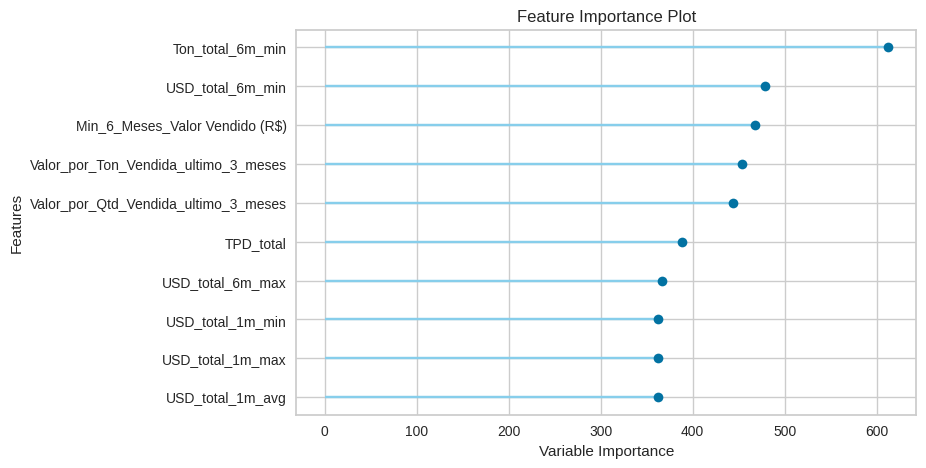

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NCM', 'TPD_total', 'TPD_avg',
                                              'WoE_Regiao_avg', 'WoE_Pais_avg',
                                              'Num_Paises', 'USD_total_1m_avg',
                                              'USD_total_1m_max',
                                              'USD_total_1m_min',
                                              'Ton_total_1m_avg',
                                              'Ton_total_1m_max',
                                              'Ton_total_1m_min',
                                              'USD_total_3m_avg',
                                              'USD_total_3m_max',
                                              'USD_total_3m_min',
                                              'Ton_total_3...
                                              'Min_3_Meses_Valor Vendido (R$)', ...],
        

In [23]:
from pycaret.regression import *

# Inicialize o ambiente de configuração do PyCaret
# 'Ton_total' é a variável alvo. Substitua por seu nome exato.
regression_setup = setup(data=base_analitica[(base_analitica['Data'] >= '2023-02-01') & (base_analitica['Data'] <= '2024-08-01') & (base_analitica['NCM'] == 70132800)],
                         target='Ton_total',
                         train_size = 0.8,
                         session_id=123,
                         normalize=True,
                         normalize_method = 'minmax',
                         n_features_to_select = 1,
                         ignore_features=['Data'])  # Ignore a coluna de data se não for diretamente utilizável

# Compare modelos para encontrar o mais adequado
best_model = compare_models()

# Visualize a importância das variáveis para o melhor modelo
plot_model(best_model, plot='feature')

# Se desejar salvar o modelo
save_model(best_model, 'melhor_modelo_pycaret')

,Description,Value
0,Session id,123
1,Target,Ton_total
2,Target type,Regression
3,Original data shape,"(57, 62)"
4,Transformed data shape,"(57, 61)"
5,Transformed train set shape,"(45, 61)"
6,Transformed test set shape,"(12, 61)"
7,Ignore features,1
8,Numeric features,60
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,530.0960,560021.9991,681.8761,0.7290,0.2329,0.1932,0.0330
br,Bayesian Ridge,532.3152,522102.9833,664.0137,0.7189,0.2335,0.1996,0.0760
par,Passive Aggressive Regressor,497.6088,504857.2509,654.8476,0.6970,0.2299,0.1776,0.0560
omp,Orthogonal Matching Pursuit,585.8398,624230.6682,714.9908,0.6943,0.2476,0.2135,0.0520
en,Elastic Net,544.0738,530179.7752,671.4801,0.6814,0.2389,0.2064,0.0410
knn,K Neighbors Regressor,599.9110,643837.8688,751.0980,0.6147,0.2823,0.2427,0.0570
ada,AdaBoost Regressor,657.3210,740878.1990,797.6604,0.5462,0.2739,0.2539,0.1080
rf,Random Forest Regressor,607.2881,690815.1275,752.6304,0.5331,0.2509,0.2261,0.2120
llar,Lasso Least Angle Regression,501.9095,542609.9707,647.0855,0.5156,0.2095,0.1753,0.0630
xgboost,Extreme Gradient Boosting,690.5387,1241557.0641,901.1492,0.4853,0.2958,0.2530,0.1410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

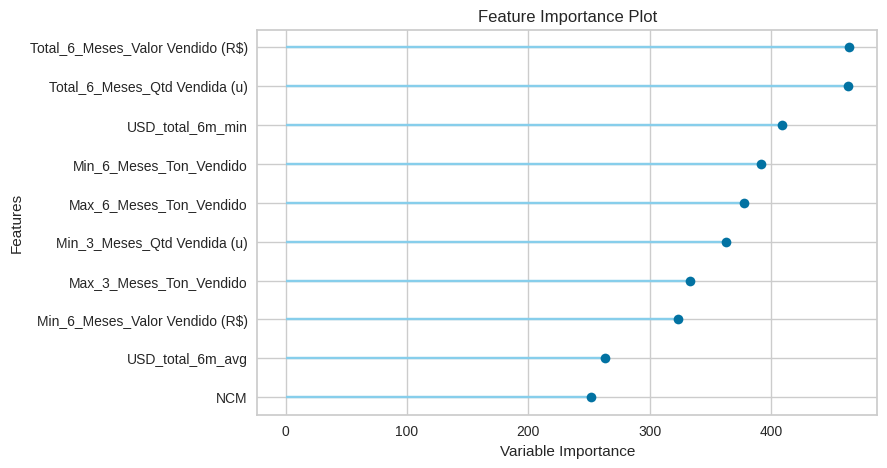

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NCM', 'TPD_total', 'TPD_avg',
                                              'WoE_Regiao_avg', 'WoE_Pais_avg',
                                              'Num_Paises', 'USD_total_1m_avg',
                                              'USD_total_1m_max',
                                              'USD_total_1m_min',
                                              'Ton_total_1m_avg',
                                              'Ton_total_1m_max',
                                              'Ton_total_1m_min',
                                              'USD_total_3m_avg',
                                              'USD_total_3m_max',
                                              'USD_total_3m_min',
                                              'Ton_total_3...
                                              'Min_3_Meses_Valor Vendido (R$)', ...],
        

In [20]:
from pycaret.regression import *

# Inicialize o ambiente de configuração do PyCaret
# 'Ton_total' é a variável alvo. Substitua por seu nome exato.
regression_setup = setup(data=base_analitica[(base_analitica['Data'] >= '2023-02-01') & (base_analitica['Data'] <= '2024-08-01')],
                         target='Ton_total',
                         train_size = 0.8,
                         session_id=123,
                         normalize=True,
                         normalize_method = 'zscore',
                         n_features_to_select = 1,
                         ignore_features=['Data'])  # Ignore a coluna de data se não for diretamente utilizável

# Compare modelos para encontrar o mais adequado
best_model = compare_models()

# Visualize a importância das variáveis para o melhor modelo
plot_model(best_model, plot='feature')

# Se desejar salvar o modelo
save_model(best_model, 'melhor_modelo_pycaret')

Métricas de Avaliação


* MAE (Mean Absolute Error):
Mede o erro médio absoluto entre as previsões e os valores reais. Valores menores indicam previsões mais precisas.

* MSE (Mean Squared Error):
Calcula o erro médio quadrado. Penaliza erros maiores mais do que o MAE.

* RMSE (Root Mean Squared Error):
É a raiz quadrada do MSE, útil para interpretar o erro no mesmo nível de escala dos dados.

* R2 (R-squared):
Indica a proporção da variância nos dados que é explicada pelo modelo. Valores mais próximos de 1 indicam um melhor ajuste.

* RMSLE (Root Mean Squared Logarithmic Error):
Útil para dados com grandes variações em escalas.

* MAPE (Mean Absolute Percentage Error):
Mede o erro absoluto médio em termos percentuais, sendo útil para entender o erro relativo.

* TT (Training Time):
Tempo necessário para treinar o modelo.

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ordene o DataFrame pelas datas
base_analitica = base_analitica.sort_values(by='Data')

# Divida o DataFrame em treino, validação e teste com base nas datas
train = base_analitica[(base_analitica['Data'] >= '2023-02-01') & (base_analitica['Data'] <= '2024-05-01')]
validation = base_analitica[(base_analitica['Data'] >= '2024-06-01') & (base_analitica['Data'] <= '2024-08-01')]
test = base_analitica[(base_analitica['Data'] >= '2024-09-01') & (base_analitica['Data'] <= '2024-10-01')]

# Separe as features e o target para cada conjunto
X_train, y_train = train.drop(columns=['Ton_total', 'Data']), train['Ton_total']
X_val, y_val = validation.drop(columns=['Ton_total', 'Data']), validation['Ton_total']
X_test, y_test = test.drop(columns=['Ton_total', 'Data']), test['Ton_total']

# Opcional: Escalando os dados
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
#X_test_scaled = scaler.transform(X_test)

# Verifique as formas dos conjuntos de dados
print(f'Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}')

Treino: (48, 60), Validação: (9, 60), Teste: (6, 60)


In [272]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
predictions_val_lr = model_lr.predict(X_val_scaled)
predictions_test_lr = model_lr.predict(X_test_scaled)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_val, predictions_val_lr)))
print("Linear Regression MAE:", mean_absolute_error(y_val, predictions_val_lr))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test_lr)))
print("Linear Regression MAE:", mean_absolute_error(y_test, predictions_test_lr))

Linear Regression RMSE: 7499.882750818771
Linear Regression MAE: 5837.099110334095
Linear Regression RMSE: 6994.160805064836
Linear Regression MAE: 5217.708594823539
